## Modèle GARCH

In [ ]:
!pip install arch
!wget -q https://raw.githubusercontent.com/Undeavor/PE28/main/CREDITAGRICOLESA_2025-10-05.txt -O CA.txt

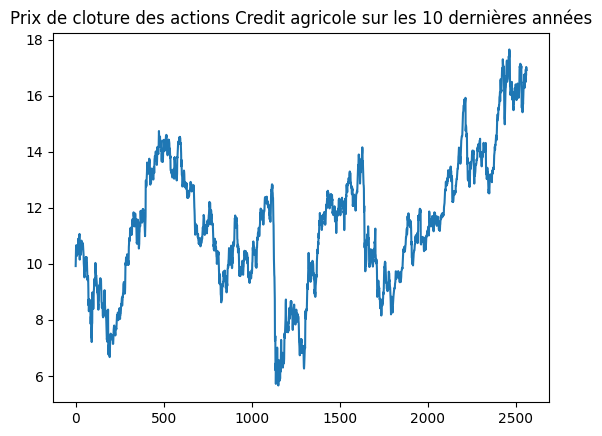

In [ ]:
from arch import arch_model
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
from pylab import rcParams

df = pd.read_csv("/content/CA.txt", sep="\t",usecols=["date", "ouv", "haut", "bas", "clot", "vol", "devise"], parse_dates=["date"])

#print(df.head())
plt.plot(df.clot)
plt.title('Prix de cloture des actions Credit agricole sur les 10 dernières années')
plt.show()

Ici pas de dividendes ( on ne sait pas comment les telecharger sur boursorama )

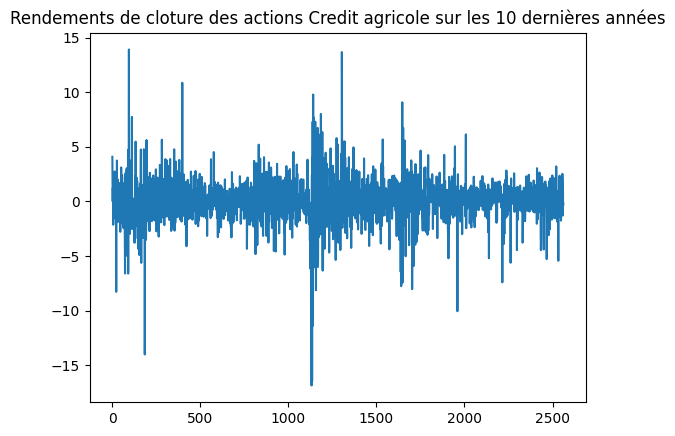

In [ ]:
# Calculate daily returns as percentage price changes
df['Return'] = 100 * (df['clot'].pct_change())

#print(df['Return'].head())
#print(df['Return'].tail(50))
#plt.plot(df.Return)[-50:])
plt.plot(df.Return)
plt.title('Rendements de cloture des actions Credit agricole sur les 10 dernières années')
plt.show()

In [ ]:
#Choix 1:
returns = df.Return

#Choix 2:
#returns = df.Return[:1350] #changement de point de référence : ici des données localement beaucoup plus volatiles

returns = returns.replace([np.inf, -np.inf], np.nan)
returns = returns.dropna()

In [ ]:
am = arch_model(returns, mean='zero', vol='Garch', p=1, q=1, dist = 'normal') #on prend une loi de student
res = am.fit(disp='off')
print(res.summary())


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4957.64
Distribution:                  Normal   AIC:                           9921.28
Method:            Maximum Likelihood   BIC:                           9938.82
                                        No. Observations:                 2561
Date:                Sat, Oct 11 2025   Df Residuals:                     2561
Time:                        19:17:04   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0889  4.029e-02      2.205  2.744e-02 [9.881e-0

In [ ]:
# Make 5-period ahead forecast
forecast = res.forecast(horizon = 5)

print(forecast.variance[-1:])

           h.1       h.2       h.3       h.4       h.5
2561  2.082907  2.117684  2.151558  2.184553  2.216692


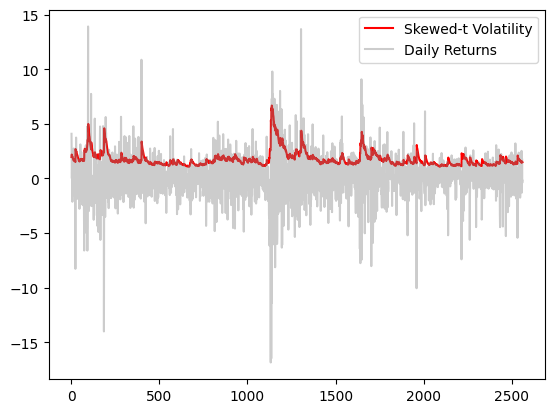

In [ ]:
# On compare avec la vraie courbe
vol = res.conditional_volatility
plt.plot(vol, color = 'red', label = 'Skewed-t Volatility')
plt.plot(df['Return'], color = 'grey',
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

/tmp/ipython-input-1418983068.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50, color='r')


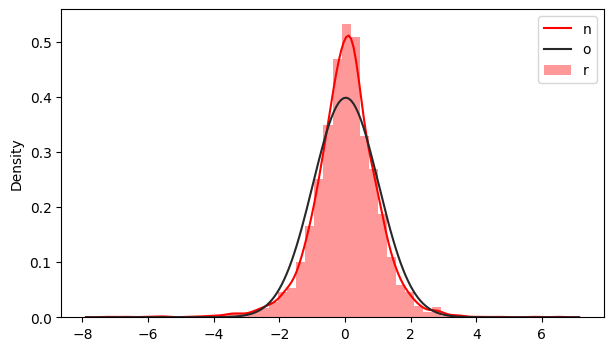

In [ ]:
#On regarde la distribution obtenue par le modèle GARCH
gm_resid = res.resid
gm_std = res.conditional_volatility

# on standardise
gm_std_resid = gm_resid /gm_std

# rouge = réalité
plt.figure(figsize=(7,4))
sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50, color='r')
plt.legend('normal')
plt.show()

In [ ]:
#BIC/AIC
print(res.bic)
print(res.aic) #jsp si ca marche

NameError: name 'res' is not defined

In [ ]:
#Fenetre glissante

## différentes variantes du modèle GARCH

## Traitement des hautes fréquences

## Utilisation de Yfinance

In [ ]:
#!pip install yfinance #apparement déjà installé de base

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
#ex : AAPL
#intervalles possibles de temps : 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
#1m data is only retrievable for the last 7 days, and anything intraday (interval <1d) only for the last 60 days.
#de la data sur 7 jours, intervalles de 1s, fait environ 2000 valeurs ( sachant qu'on peut faire en sorte de prendr)

apple= yf.Ticker("aapl")

# show actions (dividends, splits)
apple.actions

# show dividends
apple.dividends

# show splits
apple.splits

ticker = yf.download("AAPL", period="7d", interval="1m")
print(ticker)


/tmp/ipython-input-3304036262.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker = yf.download("AAPL", period="7d", interval="1m")
[*********************100%***********************]  1 of 1 completed

Price                           Close        High         Low        Open  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Datetime                                                                    
2025-10-02 13:30:00+00:00  256.459991  256.829987  256.220093  256.589996   
2025-10-02 13:31:00+00:00  256.369995  256.850006  256.350006  256.480011   
2025-10-02 13:32:00+00:00  257.160004  257.299988  256.260010  256.355011   
2025-10-02 13:33:00+00:00  256.750000  257.239990  256.640015  257.140015   
2025-10-02 13:34:00+00:00  255.899994  257.049988  255.835999  256.737488   
...                               ...         ...         ...         ...   
2025-10-10 19:55:00+00:00  244.970001  245.300003  244.570007  245.240005   
2025-10-10 19:56:00+00:00  244.860001  245.059998  244.809998  244.970001   
2025-10-10 19:57:00+00:00  245.449997  245.459900  244.850006  244.860001   
2025-10-10 19:58:00+00:00  245.395004  245.570007  245.279999  245.440002   

## Google Finance
pas sûr que ce soit vraiment mieux que yfinance pour le moment ( ni même mieux que des données téléchargées sur internet )

In [ ]:
#!pip install googlefinance

## LSTM

In [2]:
!wget -q https://raw.githubusercontent.com/Undeavor/PE28/main/sp500.xlsx -O sp500.xlsx

In [3]:
#clear data
import pandas as pd
import numpy as np

sp = pd.read_excel('/content/sp500.xlsx')

rolling_window_size = 22 #????????? jours ???????

# Calculate daily log returns
sp['log_returns'] = np.log(sp['Close'] / sp['Close'].shift(1))

# Calculate volatility as the std of daily log returns
sp['volatility'] = sp['log_returns'].rolling(window=rolling_window_size).std()

# Add lagged volatility
lag_days = 1
for i in range(1, lag_days + 1):
    sp[f'lagged_volatility_{i}'] = sp['volatility'].shift(i)

sp.dropna(inplace=True)

# Clean dataset
sp.Date = pd.to_datetime(sp.Date)
sp.dropna(inplace = True)
sp.drop(columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], inplace = True)

# Filter for dates >= 2000 year
sp_2000 = sp[sp.Date >= '01-01-2000']

# Save
sp_2000.to_excel('/content/sp500_lstm.xlsx')

In [4]:
#function declaration
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Convert to LSTM-friendly format
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Function to create the LSTM model
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, activation='tanh', input_shape=input_shape))
    model.add(Dropout(0.1))
    model.add(LSTM(128, return_sequences=False, activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Function to decide if retraining is needed
def should_retrain(counter, interval=252):
    return counter % interval == 0

In [ ]:
#parameter tuning
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

# Load data
df = pd.read_excel('data/sp500_lstm.xlsx')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter for dates >= 2000 year
df = df[df.Date >= '2000-01-01']

# Setup features and target column
feature_columns = [col for col in df.columns if col not in ['volatility', 'Date']]
target_column = 'volatility'

# Prepare data
time_steps = 22  # Sequence length
X, y = create_dataset(df[feature_columns], df[target_column].values.reshape(-1, 1), time_steps) # [samples, time steps, features]
input_shape = (time_steps, X.shape[2])

# Hyperparameter tuning on the first 15 years of data
index_15_years = 252*15
tune_X, tune_y = X[:index_15_years], y[:index_15_years]

# Modified create_model function to incorporate hyperparameters
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(LSTM(units=hp.Choice('units_lstm_' + str(i), [32,64,128]),
                       activation=hp.Choice('activation_' + str(i), ['tanh', 'relu']),
                       return_sequences=True if i < hp.get('num_layers') - 1 else False,
                       input_shape=input_shape))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.3, step=0.1)))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.01, 0.001, 0.0001])),
                  loss=hp.Choice('loss', ['mean_squared_error', 'mean_absolute_error']))
    return model

# Configure the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50,
    executions_per_trial=3,
    directory='model_tuning',
    project_name='LSTM_Tuning'
)

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Start hyperparameter search
tuner.search(tune_X, tune_y, epochs=50, validation_split=0.6, callbacks=[early_stopping], verbose = 1)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best hyperparameters: {best_hps.values}")

In [ ]:
########Marche pas
import os
import random
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Load sp_lstm data
df = pd.read_excel('/content/sp500_lstm.xlsx')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter for dates >= 2000 year
df = df[df.Date >= '2000-01-01']

# Setup features and target column
feature_columns = [col for col in df.columns if col not in ['volatility', 'Date']]
target_column = 'volatility'

time_steps = 22  # Sequence length
X, y = create_dataset(df[feature_columns], df[target_column].values.reshape(-1, 1), time_steps) # [samples, time steps, features]

# Set random seeds for reproducibility
os.environ['PYTHONHASHSEED'] = '3'
random.seed(3)
np.random.seed(3)
tf.random.set_seed(3)

# Setup for predictions
input_shape = (time_steps, X.shape[2])
model_save_path = 'lstm.weights.h5'

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

initial_train_size = 12 * 252
validation_size = 3 * 252

results = []
counter = 0

# Walk forward prediction with model refitting every 252 days
for i in range(len(df) - initial_train_size - validation_size - 1):
    # Check if there is enough data for the test set to form a complete sequence
    if (i + initial_train_size + validation_size + time_steps > len(X)):
        print("Not enough data to form a complete sequence for testing. Ending predictions.")
        break  # Exit the loop if there isn't enough data left for a full sequence

    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    # Fit scaler on current training data
    scaler_X.fit(X[i:i+initial_train_size].reshape(-1, X.shape[2]))
    scaler_y.fit(y[i:i+initial_train_size].reshape(-1, 1))

    # Transform train, validation, and test data
    train_X = scaler_X.transform(X[i:i+initial_train_size].reshape(-1, X.shape[2])).reshape(-1, time_steps, X.shape[2])
    train_y = scaler_y.transform(y[i:i+initial_train_size].reshape(-1, 1)).reshape(-1, 1)
    val_X = scaler_X.transform(X[i+initial_train_size:i+initial_train_size+validation_size].reshape(-1, X.shape[2])).reshape(-1, time_steps, X.shape[2])
    val_y = scaler_y.transform(y[i+initial_train_size:i+initial_train_size+validation_size].reshape(-1, 1)).reshape(-1, 1)
    test_X = scaler_X.transform(X[i+initial_train_size+validation_size:i+initial_train_size+validation_size+1].reshape(-1, X.shape[2])).reshape(-1, time_steps, X.shape[2])
    test_y = scaler_y.transform(y[i+initial_train_size+validation_size:i+initial_train_size+validation_size+1].reshape(-1, 1)).reshape(-1, 1)

    if should_retrain(counter) or not os.path.exists(model_save_path):
        model = create_model(input_shape)
        model.fit(train_X, train_y, epochs=100, batch_size=64, validation_data=(val_X, val_y), verbose=0, callbacks=[early_stopping])
        model.save_weights(model_save_path)
    else:
        model = create_model(input_shape)
        model.load_weights(model_save_path)
        model.fit(train_X[-1].reshape(1, *train_X[-1].shape), train_y[-1].reshape(1, 1), epochs=1, verbose=0)

    predicted = model.predict(test_X)
    predicted = scaler_y.inverse_transform(predicted.reshape(-1, 1))
    actual = scaler_y.inverse_transform(test_y.reshape(-1, 1))
    mae = mean_absolute_error(actual, predicted)

        # Print current results
    current_result = {
        'train_start': df['Date'][i+time_steps],
        'train_end': df['Date'][i+initial_train_size+time_steps-1],
        'validation_start': df['Date'][i+initial_train_size+time_steps],
        'validation_end': df['Date'][i+initial_train_size+validation_size+time_steps-1],
        'test_date': df['Date'][i+initial_train_size+validation_size+time_steps],
        'prediction': predicted.flatten()[0],
        'actual': actual.flatten()[0],
        'mae': mae
    }
    print(current_result)

    results.append(current_result)
    counter += 1

lstm_results = pd.DataFrame(results)
lstm_results.to_excel('/content/results_lstm.xlsx')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
{'train_start': Timestamp('2000-02-03 00:00:00'), 'train_end': Timestamp('2012-02-09 00:00:00'), 'validation_start': Timestamp('2012-02-10 00:00:00'), 'validation_end': Timestamp('2015-02-12 00:00:00'), 'test_date': Timestamp('2015-02-13 00:00:00'), 'prediction': np.float32(0.00940004), 'actual': np.float64(0.009519290986968111), 'mae': 0.0001192510756979695}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
{'train_start': Timestamp('2000-02-04 00:00:00'), 'train_end': Timestamp('2012-02-10 00:00:00'), 'validation_start': Timestamp('2012-02-13 00:00:00'), 'validation_end': Timestamp('2015-02-13 00:00:00'), 'test_date': Timestamp('2015-02-17 00:00:00'), 'prediction': np.float32(0.011681564), 'actual': np.float64(0.009372619059865864), 'mae': 0.0023089450923748887}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
{'train_start': Timestamp('2000-02-07 00:00:00'), 'train_end': Timestamp('2012-02-13 00:00:00'), 'validation_start': Timestamp('2012-02-14 00:00:00'), 'validation_end': Timestamp('2015-02-17 00:00:00'), 'test_date': Timestamp('2015-02-18 00:00:00'), 'prediction': np.float32(0.01164726), 'actual': np.float64(0.00904886006741344), 'mae': 0.0025983997491139266}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
{'train_start': Timestamp('2000-02-08 00:00:00'), 'train_end': Timestamp('2012-02-14 00:00:00'), 'validation_start': Timestamp('2012-02-15 00:00:00'), 'validation_end': Timestamp('2015-02-18 00:00:00'), 'test_date': Timestamp('2015-02-19 00:00:00'), 'prediction': np.float32(0.0073372764), 'actual': np.float64(0.008733822691041363), 'mae': 0.0013965463328839672}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


{'train_start': Timestamp('2000-02-09 00:00:00'), 'train_end': Timestamp('2012-02-15 00:00:00'), 'validation_start': Timestamp('2012-02-16 00:00:00'), 'validation_end': Timestamp('2015-02-19 00:00:00'), 'test_date': Timestamp('2015-02-20 00:00:00'), 'prediction': np.float32(0.011560726), 'actual': np.float64(0.008783431571092085), 'mae': 0.002777294408414885}


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
{'train_start': Timestamp('2000-02-10 00:00:00'), 'train_end': Timestamp('2012-02-16 00:00:00'), 'validation_start': Timestamp('2012-02-17 00:00:00'), 'validation_end': Timestamp('2015-02-20 00:00:00'), 'test_date': Timestamp('2015-02-23 00:00:00'), 'prediction': np.float32(0.0112379035), 'actual': np.float64(0.008772742401327282), 'mae': 0.002465161096785873}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
{'train_start': Timestamp('2000-02-11 00:00:00'), 'train_end': Timestamp('2012-02-17 00:00:00'), 'validation_start': Timestamp('2012-02-21 00:00:00'), 'validation_end': Timestamp('2015-02-23 00:00:00'), 'test_date': Timestamp('2015-02-24 00:00:00'), 'prediction': np.float32(0.005988358), 'actual': np.float64(0.008250080667986225), 'mae': 0.002261722613676142}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
{'train_start': Timestamp('2000-02-14 00:00:00'), 'train_end': Timestamp('2012-02-21 00:00:00'), 'validation_start': Timestamp('2012-02-22 00:00:00'), 'validation_end': Timestamp('2015-02-24 00:00:00'), 'test_date': Timestamp('2015-02-25 00:00:00'), 'prediction': np.float32(0.011099248), 'actual': np.float64(0.008129275855904818), 'mae': 0.0029699723372995854}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
{'train_start': Timestamp('2000-02-15 00:00:00'), 'train_end': Timestamp('2012-02-22 00:00:00'), 'validation_start': Timestamp('2012-02-23 00:00:00'), 'validation_end': Timestamp('2015-02-25 00:00:00'), 'test_date': Timestamp('2015-02-26 00:00:00'), 'prediction': np.float32(0.010872724), 'actual': np.float64(0.008146262337342199), 'mae': 0.002726461197361056}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
{'train_start': Timestamp('2000-02-16 00:00:00'), 'train_end': Timestamp('2012-02-23 00:00:00'), 'validation_start': Timestamp('2012-02-24 00:00:00'), 'validation_end': Timestamp('2015-02-26 00:00:00'), 'test_date': Timestamp('2015-02-27 00:00:00'), 'prediction': np.float32(0.01076577), 'actual': np.float64(0.007531045270796507), 'mae': 0.0032347251794379063}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
{'train_start': Timestamp('2000-02-17 00:00:00'), 'train_end': Timestamp('2012-02-24 00:00:00'), 'validation_start': Timestamp('2012-02-27 00:00:00'), 'validation_end': Timestamp('2015-02-27 00:00:00'), 'test_date': Timestamp('2015-03-02 00:00:00'), 'prediction': np.float32(0.010633141), 'actual': np.float64(0.006765323493617852), 'mae': 0.0038678173087655712}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
{'train_start': Timestamp('2000-02-18 00:00:00'), 'train_end': Timestamp('2012-02-27 00:00:00'), 'validation_start': Timestamp('2012-02-28 00:00:00'), 'validation_end': Timestamp('2015-03-02 00:00:00'), 'test_date': Timestamp('2015-03-03 00:00:00'), 'prediction': np.float32(0.0052302503), 'actual': np.float64(0.006740986586005256), 'mae': 0.0015107362833030671}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
{'train_start': Timestamp('2000-02-22 00:00:00'), 'train_end': Timestamp('2012-02-28 00:00:00'), 'validation_start': Timestamp('2012-02-29 00:00:00'), 'validation_end': Timestamp('2015-03-03 00:00:00'), 'test_date': Timestamp('2015-03-04 00:00:00'), 'prediction': np.float32(0.0042326404), 'actual': np.float64(0.006039924394323687), 'mae': 0.001807284016146521}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
{'train_start': Timestamp('2000-02-23 00:00:00'), 'train_end': Timestamp('2012-02-29 00:00:00'), 'validation_start': Timestamp('2012-03-01 00:00:00'), 'validation_end': Timestamp('2015-03-04 00:00:00'), 'test_date': Timestamp('2015-03-05 00:00:00'), 'prediction': np.float32(0.0080083385), 'actual': np.float64(0.005560013256913396), 'mae': 0.002448325254076747}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
{'train_start': Timestamp('2000-02-24 00:00:00'), 'train_end': Timestamp('2012-03-01 00:00:00'), 'validation_start': Timestamp('2012-03-02 00:00:00'), 'validation_end': Timestamp('2015-03-05 00:00:00'), 'test_date': Timestamp('2015-03-06 00:00:00'), 'prediction': np.float32(0.0035935899), 'actual': np.float64(0.00582054958449869), 'mae': 0.002226959706788944}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
{'train_start': Timestamp('2000-02-25 00:00:00'), 'train_end': Timestamp('2012-03-02 00:00:00'), 'validation_start': Timestamp('2012-03-05 00:00:00'), 'validation_end': Timestamp('2015-03-06 00:00:00'), 'test_date': Timestamp('2015-03-09 00:00:00'), 'prediction': np.float32(0.00791604), 'actual': np.float64(0.005769526664640061), 'mae': 0.0021465131225928144}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
{'train_start': Timestamp('2000-02-28 00:00:00'), 'train_end': Timestamp('2012-03-05 00:00:00'), 'validation_start': Timestamp('2012-03-06 00:00:00'), 'validation_end': Timestamp('2015-03-09 00:00:00'), 'test_date': Timestamp('2015-03-10 00:00:00'), 'prediction': np.float32(0.007992034), 'actual': np.float64(0.006541471985173483), 'mae': 0.0014505618615028668}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
{'train_start': Timestamp('2000-02-29 00:00:00'), 'train_end': Timestamp('2012-03-06 00:00:00'), 'validation_start': Timestamp('2012-03-07 00:00:00'), 'validation_end': Timestamp('2015-03-10 00:00:00'), 'test_date': Timestamp('2015-03-11 00:00:00'), 'prediction': np.float32(0.00871315), 'actual': np.float64(0.006516238494537312), 'mae': 0.0021969119024057805}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
{'train_start': Timestamp('2000-03-01 00:00:00'), 'train_end': Timestamp('2012-03-07 00:00:00'), 'validation_start': Timestamp('2012-03-08 00:00:00'), 'validation_end': Timestamp('2015-03-11 00:00:00'), 'test_date': Timestamp('2015-03-12 00:00:00'), 'prediction': np.float32(0.009439237), 'actual': np.float64(0.006999790464828734), 'mae': 0.0024394469509618237}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
{'train_start': Timestamp('2000-03-02 00:00:00'), 'train_end': Timestamp('2012-03-08 00:00:00'), 'validation_start': Timestamp('2012-03-09 00:00:00'), 'validation_end': Timestamp('2015-03-12 00:00:00'), 'test_date': Timestamp('2015-03-13 00:00:00'), 'prediction': np.float32(0.009166746), 'actual': np.float64(0.006742900540429684), 'mae': 0.002423845859867004}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
{'train_start': Timestamp('2000-03-03 00:00:00'), 'train_end': Timestamp('2012-03-09 00:00:00'), 'validation_start': Timestamp('2012-03-12 00:00:00'), 'validation_end': Timestamp('2015-03-13 00:00:00'), 'test_date': Timestamp('2015-03-16 00:00:00'), 'prediction': np.float32(0.0057997173), 'actual': np.float64(0.00735588121807154), 'mae': 0.0015561639482336836}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
{'train_start': Timestamp('2000-03-06 00:00:00'), 'train_end': Timestamp('2012-03-12 00:00:00'), 'validation_start': Timestamp('2012-03-13 00:00:00'), 'validation_end': Timestamp('2015-03-16 00:00:00'), 'test_date': Timestamp('2015-03-17 00:00:00'), 'prediction': np.float32(0.009382241), 'actual': np.float64(0.007087206165336639), 'mae': 0.0022950352402100263}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
{'train_start': Timestamp('2000-03-07 00:00:00'), 'train_end': Timestamp('2012-03-13 00:00:00'), 'validation_start': Timestamp('2012-03-14 00:00:00'), 'validation_end': Timestamp('2015-03-17 00:00:00'), 'test_date': Timestamp('2015-03-18 00:00:00'), 'prediction': np.float32(0.010227419), 'actual': np.float64(0.007516212789786171), 'mae': 0.002711206646191765}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
{'train_start': Timestamp('2000-03-08 00:00:00'), 'train_end': Timestamp('2012-03-14 00:00:00'), 'validation_start': Timestamp('2012-03-15 00:00:00'), 'validation_end': Timestamp('2015-03-18 00:00:00'), 'test_date': Timestamp('2015-03-19 00:00:00'), 'prediction': np.float32(0.010240861), 'actual': np.float64(0.00757963521417981), 'mae': 0.0026612260005175513}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
{'train_start': Timestamp('2000-03-09 00:00:00'), 'train_end': Timestamp('2012-03-15 00:00:00'), 'validation_start': Timestamp('2012-03-16 00:00:00'), 'validation_end': Timestamp('2015-03-19 00:00:00'), 'test_date': Timestamp('2015-03-20 00:00:00'), 'prediction': np.float32(0.006286445), 'actual': np.float64(0.007829779542888163), 'mae': 0.0015433344691047658}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
{'train_start': Timestamp('2000-03-10 00:00:00'), 'train_end': Timestamp('2012-03-16 00:00:00'), 'validation_start': Timestamp('2012-03-19 00:00:00'), 'validation_end': Timestamp('2015-03-20 00:00:00'), 'test_date': Timestamp('2015-03-23 00:00:00'), 'prediction': np.float32(0.009717207), 'actual': np.float64(0.007836319383446037), 'mae': 0.0018808880185448539}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
{'train_start': Timestamp('2000-03-13 00:00:00'), 'train_end': Timestamp('2012-03-19 00:00:00'), 'validation_start': Timestamp('2012-03-20 00:00:00'), 'validation_end': Timestamp('2015-03-23 00:00:00'), 'test_date': Timestamp('2015-03-24 00:00:00'), 'prediction': np.float32(0.005160696), 'actual': np.float64(0.007828658535265815), 'mae': 0.0026679626620649214}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
{'train_start': Timestamp('2000-03-14 00:00:00'), 'train_end': Timestamp('2012-03-20 00:00:00'), 'validation_start': Timestamp('2012-03-21 00:00:00'), 'validation_end': Timestamp('2015-03-24 00:00:00'), 'test_date': Timestamp('2015-03-25 00:00:00'), 'prediction': np.float32(0.010013351), 'actual': np.float64(0.00839779609103197), 'mae': 0.0016155551258803004}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
{'train_start': Timestamp('2000-03-15 00:00:00'), 'train_end': Timestamp('2012-03-21 00:00:00'), 'validation_start': Timestamp('2012-03-22 00:00:00'), 'validation_end': Timestamp('2015-03-25 00:00:00'), 'test_date': Timestamp('2015-03-26 00:00:00'), 'prediction': np.float32(0.0060213017), 'actual': np.float64(0.008357993744867828), 'mae': 0.0023366920171258715}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
{'train_start': Timestamp('2000-03-16 00:00:00'), 'train_end': Timestamp('2012-03-22 00:00:00'), 'validation_start': Timestamp('2012-03-23 00:00:00'), 'validation_end': Timestamp('2015-03-26 00:00:00'), 'test_date': Timestamp('2015-03-27 00:00:00'), 'prediction': np.float32(0.011089404), 'actual': np.float64(0.008393989870993662), 'mae': 0.0026954142425970554}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
{'train_start': Timestamp('2000-03-17 00:00:00'), 'train_end': Timestamp('2012-03-23 00:00:00'), 'validation_start': Timestamp('2012-03-26 00:00:00'), 'validation_end': Timestamp('2015-03-27 00:00:00'), 'test_date': Timestamp('2015-03-30 00:00:00'), 'prediction': np.float32(0.011136063), 'actual': np.float64(0.008859525251740085), 'mae': 0.0022765381228388674}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
{'train_start': Timestamp('2000-03-20 00:00:00'), 'train_end': Timestamp('2012-03-26 00:00:00'), 'validation_start': Timestamp('2012-03-27 00:00:00'), 'validation_end': Timestamp('2015-03-30 00:00:00'), 'test_date': Timestamp('2015-03-31 00:00:00'), 'prediction': np.float32(0.011366297), 'actual': np.float64(0.009023245262626673), 'mae': 0.002343051296945547}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
{'train_start': Timestamp('2000-03-21 00:00:00'), 'train_end': Timestamp('2012-03-27 00:00:00'), 'validation_start': Timestamp('2012-03-28 00:00:00'), 'validation_end': Timestamp('2015-03-31 00:00:00'), 'test_date': Timestamp('2015-04-01 00:00:00'), 'prediction': np.float32(0.011856555), 'actual': np.float64(0.00891120219566185), 'mae': 0.002945352811736279}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
{'train_start': Timestamp('2000-03-22 00:00:00'), 'train_end': Timestamp('2012-03-28 00:00:00'), 'validation_start': Timestamp('2012-03-29 00:00:00'), 'validation_end': Timestamp('2015-04-01 00:00:00'), 'test_date': Timestamp('2015-04-02 00:00:00'), 'prediction': np.float32(0.012101427), 'actual': np.float64(0.00893531200291678), 'mae': 0.003166114717702421}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
{'train_start': Timestamp('2000-03-23 00:00:00'), 'train_end': Timestamp('2012-03-29 00:00:00'), 'validation_start': Timestamp('2012-03-30 00:00:00'), 'validation_end': Timestamp('2015-04-02 00:00:00'), 'test_date': Timestamp('2015-04-06 00:00:00'), 'prediction': np.float32(0.01169998), 'actual': np.float64(0.009036240219846742), 'mae': 0.002663739904984457}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
{'train_start': Timestamp('2000-03-24 00:00:00'), 'train_end': Timestamp('2012-03-30 00:00:00'), 'validation_start': Timestamp('2012-04-02 00:00:00'), 'validation_end': Timestamp('2015-04-06 00:00:00'), 'test_date': Timestamp('2015-04-07 00:00:00'), 'prediction': np.float32(0.0066486523), 'actual': np.float64(0.009035736244876491), 'mae': 0.0023870839893413657}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
{'train_start': Timestamp('2000-03-27 00:00:00'), 'train_end': Timestamp('2012-04-02 00:00:00'), 'validation_start': Timestamp('2012-04-03 00:00:00'), 'validation_end': Timestamp('2015-04-07 00:00:00'), 'test_date': Timestamp('2015-04-08 00:00:00'), 'prediction': np.float32(0.0065913717), 'actual': np.float64(0.0085163557361223), 'mae': 0.001924984009877612}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
{'train_start': Timestamp('2000-03-28 00:00:00'), 'train_end': Timestamp('2012-04-03 00:00:00'), 'validation_start': Timestamp('2012-04-04 00:00:00'), 'validation_end': Timestamp('2015-04-08 00:00:00'), 'test_date': Timestamp('2015-04-09 00:00:00'), 'prediction': np.float32(0.011595779), 'actual': np.float64(0.008527625671187297), 'mae': 0.0030681534273830496}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
{'train_start': Timestamp('2000-03-29 00:00:00'), 'train_end': Timestamp('2012-04-04 00:00:00'), 'validation_start': Timestamp('2012-04-05 00:00:00'), 'validation_end': Timestamp('2015-04-09 00:00:00'), 'test_date': Timestamp('2015-04-10 00:00:00'), 'prediction': np.float32(0.01130343), 'actual': np.float64(0.007645095589449029), 'mae': 0.003658334833691497}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
{'train_start': Timestamp('2000-03-30 00:00:00'), 'train_end': Timestamp('2012-04-05 00:00:00'), 'validation_start': Timestamp('2012-04-09 00:00:00'), 'validation_end': Timestamp('2015-04-10 00:00:00'), 'test_date': Timestamp('2015-04-13 00:00:00'), 'prediction': np.float32(0.0058571715), 'actual': np.float64(0.007719049237229008), 'mae': 0.0018618777464405479}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
{'train_start': Timestamp('2000-03-31 00:00:00'), 'train_end': Timestamp('2012-04-09 00:00:00'), 'validation_start': Timestamp('2012-04-10 00:00:00'), 'validation_end': Timestamp('2015-04-13 00:00:00'), 'test_date': Timestamp('2015-04-14 00:00:00'), 'prediction': np.float32(0.0048706755), 'actual': np.float64(0.007292242776580048), 'mae': 0.0024215672723724366}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
{'train_start': Timestamp('2000-04-03 00:00:00'), 'train_end': Timestamp('2012-04-10 00:00:00'), 'validation_start': Timestamp('2012-04-11 00:00:00'), 'validation_end': Timestamp('2015-04-14 00:00:00'), 'test_date': Timestamp('2015-04-15 00:00:00'), 'prediction': np.float32(0.010323861), 'actual': np.float64(0.0071898093413558985), 'mae': 0.003134051341191194}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
{'train_start': Timestamp('2000-04-04 00:00:00'), 'train_end': Timestamp('2012-04-11 00:00:00'), 'validation_start': Timestamp('2012-04-12 00:00:00'), 'validation_end': Timestamp('2015-04-15 00:00:00'), 'test_date': Timestamp('2015-04-16 00:00:00'), 'prediction': np.float32(0.0097148195), 'actual': np.float64(0.006652424475092602), 'mae': 0.0030623950158169743}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
{'train_start': Timestamp('2000-04-05 00:00:00'), 'train_end': Timestamp('2012-04-12 00:00:00'), 'validation_start': Timestamp('2012-04-13 00:00:00'), 'validation_end': Timestamp('2015-04-16 00:00:00'), 'test_date': Timestamp('2015-04-17 00:00:00'), 'prediction': np.float32(0.009690173), 'actual': np.float64(0.007081404269218478), 'mae': 0.0026087687010764747}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
{'train_start': Timestamp('2000-04-06 00:00:00'), 'train_end': Timestamp('2012-04-13 00:00:00'), 'validation_start': Timestamp('2012-04-16 00:00:00'), 'validation_end': Timestamp('2015-04-17 00:00:00'), 'test_date': Timestamp('2015-04-20 00:00:00'), 'prediction': np.float32(0.0041880673), 'actual': np.float64(0.006873073383745863), 'mae': 0.0026850061039897935}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
{'train_start': Timestamp('2000-04-07 00:00:00'), 'train_end': Timestamp('2012-04-16 00:00:00'), 'validation_start': Timestamp('2012-04-17 00:00:00'), 'validation_end': Timestamp('2015-04-20 00:00:00'), 'test_date': Timestamp('2015-04-21 00:00:00'), 'prediction': np.float32(0.0043121935), 'actual': np.float64(0.0067953072798103), 'mae': 0.0024831137929707675}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
{'train_start': Timestamp('2000-04-10 00:00:00'), 'train_end': Timestamp('2012-04-17 00:00:00'), 'validation_start': Timestamp('2012-04-18 00:00:00'), 'validation_end': Timestamp('2015-04-21 00:00:00'), 'test_date': Timestamp('2015-04-22 00:00:00'), 'prediction': np.float32(0.008939467), 'actual': np.float64(0.006603083694098788), 'mae': 0.0023363836764113133}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
{'train_start': Timestamp('2000-04-11 00:00:00'), 'train_end': Timestamp('2012-04-18 00:00:00'), 'validation_start': Timestamp('2012-04-19 00:00:00'), 'validation_end': Timestamp('2015-04-22 00:00:00'), 'test_date': Timestamp('2015-04-23 00:00:00'), 'prediction': np.float32(0.0046211504), 'actual': np.float64(0.006609400670851227), 'mae': 0.001988250233108755}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
{'train_start': Timestamp('2000-04-12 00:00:00'), 'train_end': Timestamp('2012-04-19 00:00:00'), 'validation_start': Timestamp('2012-04-20 00:00:00'), 'validation_end': Timestamp('2015-04-23 00:00:00'), 'test_date': Timestamp('2015-04-24 00:00:00'), 'prediction': np.float32(0.009422771), 'actual': np.float64(0.006466791960620152), 'mae': 0.002955978740728629}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
{'train_start': Timestamp('2000-04-13 00:00:00'), 'train_end': Timestamp('2012-04-20 00:00:00'), 'validation_start': Timestamp('2012-04-23 00:00:00'), 'validation_end': Timestamp('2015-04-24 00:00:00'), 'test_date': Timestamp('2015-04-27 00:00:00'), 'prediction': np.float32(0.008334305), 'actual': np.float64(0.005620609546628789), 'mae': 0.00271369559076707}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
{'train_start': Timestamp('2000-04-14 00:00:00'), 'train_end': Timestamp('2012-04-23 00:00:00'), 'validation_start': Timestamp('2012-04-24 00:00:00'), 'validation_end': Timestamp('2015-04-27 00:00:00'), 'test_date': Timestamp('2015-04-28 00:00:00'), 'prediction': np.float32(0.0041038385), 'actual': np.float64(0.005578246371071724), 'mae': 0.0014744079049638786}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
{'train_start': Timestamp('2000-04-17 00:00:00'), 'train_end': Timestamp('2012-04-24 00:00:00'), 'validation_start': Timestamp('2012-04-25 00:00:00'), 'validation_end': Timestamp('2015-04-28 00:00:00'), 'test_date': Timestamp('2015-04-29 00:00:00'), 'prediction': np.float32(0.003510205), 'actual': np.float64(0.005672910690479681), 'mae': 0.0021627056153349132}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
{'train_start': Timestamp('2000-04-18 00:00:00'), 'train_end': Timestamp('2012-04-25 00:00:00'), 'validation_start': Timestamp('2012-04-26 00:00:00'), 'validation_end': Timestamp('2015-04-29 00:00:00'), 'test_date': Timestamp('2015-04-30 00:00:00'), 'prediction': np.float32(0.008218117), 'actual': np.float64(0.005578533373413584), 'mae': 0.002639583684863546}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
{'train_start': Timestamp('2000-04-19 00:00:00'), 'train_end': Timestamp('2012-04-26 00:00:00'), 'validation_start': Timestamp('2012-04-27 00:00:00'), 'validation_end': Timestamp('2015-04-30 00:00:00'), 'test_date': Timestamp('2015-05-01 00:00:00'), 'prediction': np.float32(0.003510205), 'actual': np.float64(0.005675677818609357), 'mae': 0.0021654727434645893}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
{'train_start': Timestamp('2000-04-20 00:00:00'), 'train_end': Timestamp('2012-04-27 00:00:00'), 'validation_start': Timestamp('2012-04-30 00:00:00'), 'validation_end': Timestamp('2015-05-01 00:00:00'), 'test_date': Timestamp('2015-05-04 00:00:00'), 'prediction': np.float32(0.003510205), 'actual': np.float64(0.00558480754630217), 'mae': 0.002074602471157402}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
{'train_start': Timestamp('2000-04-24 00:00:00'), 'train_end': Timestamp('2012-04-30 00:00:00'), 'validation_start': Timestamp('2012-05-01 00:00:00'), 'validation_end': Timestamp('2015-05-04 00:00:00'), 'test_date': Timestamp('2015-05-05 00:00:00'), 'prediction': np.float32(0.003510205), 'actual': np.float64(0.006212084502584631), 'mae': 0.002701879427439863}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
{'train_start': Timestamp('2000-04-25 00:00:00'), 'train_end': Timestamp('2012-05-01 00:00:00'), 'validation_start': Timestamp('2012-05-02 00:00:00'), 'validation_end': Timestamp('2015-05-05 00:00:00'), 'test_date': Timestamp('2015-05-06 00:00:00'), 'prediction': np.float32(0.0035132729), 'actual': np.float64(0.006142236407761471), 'mae': 0.00262896355605592}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
{'train_start': Timestamp('2000-04-26 00:00:00'), 'train_end': Timestamp('2012-05-02 00:00:00'), 'validation_start': Timestamp('2012-05-03 00:00:00'), 'validation_end': Timestamp('2015-05-06 00:00:00'), 'test_date': Timestamp('2015-05-07 00:00:00'), 'prediction': np.float32(0.0043970956), 'actual': np.float64(0.006175106598233794), 'mae': 0.00177801095152459}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
{'train_start': Timestamp('2000-04-27 00:00:00'), 'train_end': Timestamp('2012-05-03 00:00:00'), 'validation_start': Timestamp('2012-05-04 00:00:00'), 'validation_end': Timestamp('2015-05-07 00:00:00'), 'test_date': Timestamp('2015-05-08 00:00:00'), 'prediction': np.float32(0.0038097985), 'actual': np.float64(0.006767082324931878), 'mae': 0.0029572838160493555}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
{'train_start': Timestamp('2000-04-28 00:00:00'), 'train_end': Timestamp('2012-05-04 00:00:00'), 'validation_start': Timestamp('2012-05-07 00:00:00'), 'validation_end': Timestamp('2015-05-08 00:00:00'), 'test_date': Timestamp('2015-05-11 00:00:00'), 'prediction': np.float32(0.009189135), 'actual': np.float64(0.006824037423662899), 'mae': 0.0023650979713275453}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
{'train_start': Timestamp('2000-05-01 00:00:00'), 'train_end': Timestamp('2012-05-07 00:00:00'), 'validation_start': Timestamp('2012-05-08 00:00:00'), 'validation_end': Timestamp('2015-05-11 00:00:00'), 'test_date': Timestamp('2015-05-12 00:00:00'), 'prediction': np.float32(0.00952056), 'actual': np.float64(0.006767189270824959), 'mae': 0.002753370300858448}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
{'train_start': Timestamp('2000-05-02 00:00:00'), 'train_end': Timestamp('2012-05-08 00:00:00'), 'validation_start': Timestamp('2012-05-09 00:00:00'), 'validation_end': Timestamp('2015-05-12 00:00:00'), 'test_date': Timestamp('2015-05-13 00:00:00'), 'prediction': np.float32(0.0043259277), 'actual': np.float64(0.006691893901843379), 'mae': 0.0023659662009959913}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
{'train_start': Timestamp('2000-05-03 00:00:00'), 'train_end': Timestamp('2012-05-09 00:00:00'), 'validation_start': Timestamp('2012-05-10 00:00:00'), 'validation_end': Timestamp('2015-05-13 00:00:00'), 'test_date': Timestamp('2015-05-14 00:00:00'), 'prediction': np.float32(0.004581232), 'actual': np.float64(0.007059496011502876), 'mae': 0.002478263921953573}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
{'train_start': Timestamp('2000-05-04 00:00:00'), 'train_end': Timestamp('2012-05-10 00:00:00'), 'validation_start': Timestamp('2012-05-11 00:00:00'), 'validation_end': Timestamp('2015-05-14 00:00:00'), 'test_date': Timestamp('2015-05-15 00:00:00'), 'prediction': np.float32(0.0041958694), 'actual': np.float64(0.006985281583934491), 'mae': 0.002789412149309581}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
{'train_start': Timestamp('2000-05-05 00:00:00'), 'train_end': Timestamp('2012-05-11 00:00:00'), 'validation_start': Timestamp('2012-05-14 00:00:00'), 'validation_end': Timestamp('2015-05-15 00:00:00'), 'test_date': Timestamp('2015-05-18 00:00:00'), 'prediction': np.float32(0.004362144), 'actual': np.float64(0.007003479534239479), 'mae': 0.0026413354924330196}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
{'train_start': Timestamp('2000-05-08 00:00:00'), 'train_end': Timestamp('2012-05-14 00:00:00'), 'validation_start': Timestamp('2012-05-15 00:00:00'), 'validation_end': Timestamp('2015-05-18 00:00:00'), 'test_date': Timestamp('2015-05-19 00:00:00'), 'prediction': np.float32(0.0045079347), 'actual': np.float64(0.006490426315692495), 'mae': 0.001982491641071867}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
{'train_start': Timestamp('2000-05-09 00:00:00'), 'train_end': Timestamp('2012-05-15 00:00:00'), 'validation_start': Timestamp('2012-05-16 00:00:00'), 'validation_end': Timestamp('2015-05-19 00:00:00'), 'test_date': Timestamp('2015-05-20 00:00:00'), 'prediction': np.float32(0.0044169226), 'actual': np.float64(0.006236381342085252), 'mae': 0.001819458769085059}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
{'train_start': Timestamp('2000-05-10 00:00:00'), 'train_end': Timestamp('2012-05-16 00:00:00'), 'validation_start': Timestamp('2012-05-17 00:00:00'), 'validation_end': Timestamp('2015-05-20 00:00:00'), 'test_date': Timestamp('2015-05-21 00:00:00'), 'prediction': np.float32(0.004005586), 'actual': np.float64(0.006230331557054215), 'mae': 0.0022247457599231532}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
{'train_start': Timestamp('2000-05-11 00:00:00'), 'train_end': Timestamp('2012-05-17 00:00:00'), 'validation_start': Timestamp('2012-05-18 00:00:00'), 'validation_end': Timestamp('2015-05-21 00:00:00'), 'test_date': Timestamp('2015-05-22 00:00:00'), 'prediction': np.float32(0.0037320794), 'actual': np.float64(0.006181846633929479), 'mae': 0.0024497672267292615}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
{'train_start': Timestamp('2000-05-12 00:00:00'), 'train_end': Timestamp('2012-05-18 00:00:00'), 'validation_start': Timestamp('2012-05-21 00:00:00'), 'validation_end': Timestamp('2015-05-22 00:00:00'), 'test_date': Timestamp('2015-05-26 00:00:00'), 'prediction': np.float32(0.0036078368), 'actual': np.float64(0.006569533187337098), 'mae': 0.0029616964025421712}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
{'train_start': Timestamp('2000-05-15 00:00:00'), 'train_end': Timestamp('2012-05-21 00:00:00'), 'validation_start': Timestamp('2012-05-22 00:00:00'), 'validation_end': Timestamp('2015-05-26 00:00:00'), 'test_date': Timestamp('2015-05-27 00:00:00'), 'prediction': np.float32(0.00886453), 'actual': np.float64(0.006848363912037439), 'mae': 0.002016166450151377}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
{'train_start': Timestamp('2000-05-16 00:00:00'), 'train_end': Timestamp('2012-05-22 00:00:00'), 'validation_start': Timestamp('2012-05-23 00:00:00'), 'validation_end': Timestamp('2015-05-27 00:00:00'), 'test_date': Timestamp('2015-05-28 00:00:00'), 'prediction': np.float32(0.0092399735), 'actual': np.float64(0.006790026681330431), 'mae': 0.0024499468190405486}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
{'train_start': Timestamp('2000-05-17 00:00:00'), 'train_end': Timestamp('2012-05-23 00:00:00'), 'validation_start': Timestamp('2012-05-24 00:00:00'), 'validation_end': Timestamp('2015-05-28 00:00:00'), 'test_date': Timestamp('2015-05-29 00:00:00'), 'prediction': np.float32(0.0045347163), 'actual': np.float64(0.006906177214435691), 'mae': 0.0023714609621981325}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
{'train_start': Timestamp('2000-05-18 00:00:00'), 'train_end': Timestamp('2012-05-24 00:00:00'), 'validation_start': Timestamp('2012-05-25 00:00:00'), 'validation_end': Timestamp('2015-05-29 00:00:00'), 'test_date': Timestamp('2015-06-01 00:00:00'), 'prediction': np.float32(0.0049376483), 'actual': np.float64(0.006873349928084891), 'mae': 0.001935701620552819}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
{'train_start': Timestamp('2000-05-19 00:00:00'), 'train_end': Timestamp('2012-05-25 00:00:00'), 'validation_start': Timestamp('2012-05-29 00:00:00'), 'validation_end': Timestamp('2015-06-01 00:00:00'), 'test_date': Timestamp('2015-06-02 00:00:00'), 'prediction': np.float32(0.004475643), 'actual': np.float64(0.006487071341148782), 'mae': 0.0020114284141577957}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
{'train_start': Timestamp('2000-05-22 00:00:00'), 'train_end': Timestamp('2012-05-29 00:00:00'), 'validation_start': Timestamp('2012-05-30 00:00:00'), 'validation_end': Timestamp('2015-06-02 00:00:00'), 'test_date': Timestamp('2015-06-03 00:00:00'), 'prediction': np.float32(0.004301518), 'actual': np.float64(0.006078210160334284), 'mae': 0.0017766919585062808}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
{'train_start': Timestamp('2000-05-23 00:00:00'), 'train_end': Timestamp('2012-05-30 00:00:00'), 'validation_start': Timestamp('2012-05-31 00:00:00'), 'validation_end': Timestamp('2015-06-03 00:00:00'), 'test_date': Timestamp('2015-06-04 00:00:00'), 'prediction': np.float32(0.009483616), 'actual': np.float64(0.006320764428005292), 'mae': 0.003162851439788268}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
{'train_start': Timestamp('2000-05-24 00:00:00'), 'train_end': Timestamp('2012-05-31 00:00:00'), 'validation_start': Timestamp('2012-06-01 00:00:00'), 'validation_end': Timestamp('2015-06-04 00:00:00'), 'test_date': Timestamp('2015-06-05 00:00:00'), 'prediction': np.float32(0.0037804954), 'actual': np.float64(0.005784658729399783), 'mae': 0.0020041633540049614}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
{'train_start': Timestamp('2000-05-25 00:00:00'), 'train_end': Timestamp('2012-06-01 00:00:00'), 'validation_start': Timestamp('2012-06-04 00:00:00'), 'validation_end': Timestamp('2015-06-05 00:00:00'), 'test_date': Timestamp('2015-06-08 00:00:00'), 'prediction': np.float32(0.009159727), 'actual': np.float64(0.005875971697734959), 'mae': 0.003283755324316852}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
{'train_start': Timestamp('2000-05-26 00:00:00'), 'train_end': Timestamp('2012-06-04 00:00:00'), 'validation_start': Timestamp('2012-06-05 00:00:00'), 'validation_end': Timestamp('2015-06-08 00:00:00'), 'test_date': Timestamp('2015-06-09 00:00:00'), 'prediction': np.float32(0.0036063432), 'actual': np.float64(0.005816306250167129), 'mae': 0.0022099630739512415}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
{'train_start': Timestamp('2000-05-30 00:00:00'), 'train_end': Timestamp('2012-06-05 00:00:00'), 'validation_start': Timestamp('2012-06-06 00:00:00'), 'validation_end': Timestamp('2015-06-09 00:00:00'), 'test_date': Timestamp('2015-06-10 00:00:00'), 'prediction': np.float32(0.0044059306), 'actual': np.float64(0.005667096704795449), 'mae': 0.001261166066482156}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
{'train_start': Timestamp('2000-05-31 00:00:00'), 'train_end': Timestamp('2012-06-06 00:00:00'), 'validation_start': Timestamp('2012-06-07 00:00:00'), 'validation_end': Timestamp('2015-06-10 00:00:00'), 'test_date': Timestamp('2015-06-11 00:00:00'), 'prediction': np.float32(0.0089040585), 'actual': np.float64(0.00557418328289797), 'mae': 0.003329875203325251}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
{'train_start': Timestamp('2000-06-01 00:00:00'), 'train_end': Timestamp('2012-06-07 00:00:00'), 'validation_start': Timestamp('2012-06-08 00:00:00'), 'validation_end': Timestamp('2015-06-11 00:00:00'), 'test_date': Timestamp('2015-06-12 00:00:00'), 'prediction': np.float32(0.008632893), 'actual': np.float64(0.005744183137056205), 'mae': 0.002888709605696824}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
{'train_start': Timestamp('2000-06-02 00:00:00'), 'train_end': Timestamp('2012-06-08 00:00:00'), 'validation_start': Timestamp('2012-06-11 00:00:00'), 'validation_end': Timestamp('2015-06-12 00:00:00'), 'test_date': Timestamp('2015-06-15 00:00:00'), 'prediction': np.float32(0.00810903), 'actual': np.float64(0.005824786864013261), 'mae': 0.002284243449776583}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
{'train_start': Timestamp('2000-06-05 00:00:00'), 'train_end': Timestamp('2012-06-11 00:00:00'), 'validation_start': Timestamp('2012-06-12 00:00:00'), 'validation_end': Timestamp('2015-06-15 00:00:00'), 'test_date': Timestamp('2015-06-16 00:00:00'), 'prediction': np.float32(0.0044050817), 'actual': np.float64(0.005457578185656189), 'mae': 0.0010524964478696571}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
{'train_start': Timestamp('2000-06-06 00:00:00'), 'train_end': Timestamp('2012-06-12 00:00:00'), 'validation_start': Timestamp('2012-06-13 00:00:00'), 'validation_end': Timestamp('2015-06-16 00:00:00'), 'test_date': Timestamp('2015-06-17 00:00:00'), 'prediction': np.float32(0.007686636), 'actual': np.float64(0.005477385741259091), 'mae': 0.002209250203733213}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
{'train_start': Timestamp('2000-06-07 00:00:00'), 'train_end': Timestamp('2012-06-13 00:00:00'), 'validation_start': Timestamp('2012-06-14 00:00:00'), 'validation_end': Timestamp('2015-06-17 00:00:00'), 'test_date': Timestamp('2015-06-18 00:00:00'), 'prediction': np.float32(0.003510205), 'actual': np.float64(0.005864761068110571), 'mae': 0.002354555992965803}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
{'train_start': Timestamp('2000-06-08 00:00:00'), 'train_end': Timestamp('2012-06-14 00:00:00'), 'validation_start': Timestamp('2012-06-15 00:00:00'), 'validation_end': Timestamp('2015-06-18 00:00:00'), 'test_date': Timestamp('2015-06-19 00:00:00'), 'prediction': np.float32(0.003510205), 'actual': np.float64(0.005966502435589839), 'mae': 0.002456297360445071}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
{'train_start': Timestamp('2000-06-09 00:00:00'), 'train_end': Timestamp('2012-06-15 00:00:00'), 'validation_start': Timestamp('2012-06-18 00:00:00'), 'validation_end': Timestamp('2015-06-19 00:00:00'), 'test_date': Timestamp('2015-06-22 00:00:00'), 'prediction': np.float32(0.008070406), 'actual': np.float64(0.006120882694579947), 'mae': 0.00194952287807287}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
{'train_start': Timestamp('2000-06-12 00:00:00'), 'train_end': Timestamp('2012-06-18 00:00:00'), 'validation_start': Timestamp('2012-06-19 00:00:00'), 'validation_end': Timestamp('2015-06-22 00:00:00'), 'test_date': Timestamp('2015-06-23 00:00:00'), 'prediction': np.float32(0.0087473765), 'actual': np.float64(0.006099847796077505), 'mae': 0.002647528705482706}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
{'train_start': Timestamp('2000-06-13 00:00:00'), 'train_end': Timestamp('2012-06-19 00:00:00'), 'validation_start': Timestamp('2012-06-20 00:00:00'), 'validation_end': Timestamp('2015-06-23 00:00:00'), 'test_date': Timestamp('2015-06-24 00:00:00'), 'prediction': np.float32(0.0037401172), 'actual': np.float64(0.006279910935080731), 'mae': 0.002539793748400295}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
{'train_start': Timestamp('2000-06-14 00:00:00'), 'train_end': Timestamp('2012-06-20 00:00:00'), 'validation_start': Timestamp('2012-06-21 00:00:00'), 'validation_end': Timestamp('2015-06-24 00:00:00'), 'test_date': Timestamp('2015-06-25 00:00:00'), 'prediction': np.float32(0.0038257642), 'actual': np.float64(0.005909219265095558), 'mae': 0.002083455093316402}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
{'train_start': Timestamp('2000-06-15 00:00:00'), 'train_end': Timestamp('2012-06-21 00:00:00'), 'validation_start': Timestamp('2012-06-22 00:00:00'), 'validation_end': Timestamp('2015-06-25 00:00:00'), 'test_date': Timestamp('2015-06-26 00:00:00'), 'prediction': np.float32(0.009210182), 'actual': np.float64(0.00554363044112211), 'mae': 0.0036665519127320693}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
{'train_start': Timestamp('2000-06-16 00:00:00'), 'train_end': Timestamp('2012-06-22 00:00:00'), 'validation_start': Timestamp('2012-06-25 00:00:00'), 'validation_end': Timestamp('2015-06-26 00:00:00'), 'test_date': Timestamp('2015-06-29 00:00:00'), 'prediction': np.float32(0.00908289), 'actual': np.float64(0.007077164866579127), 'mae': 0.002005725249099183}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
{'train_start': Timestamp('2000-06-19 00:00:00'), 'train_end': Timestamp('2012-06-25 00:00:00'), 'validation_start': Timestamp('2012-06-26 00:00:00'), 'validation_end': Timestamp('2015-06-29 00:00:00'), 'test_date': Timestamp('2015-06-30 00:00:00'), 'prediction': np.float32(0.008674783), 'actual': np.float64(0.007036374889375882), 'mae': 0.0016384078114607768}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
{'train_start': Timestamp('2000-06-20 00:00:00'), 'train_end': Timestamp('2012-06-26 00:00:00'), 'validation_start': Timestamp('2012-06-27 00:00:00'), 'validation_end': Timestamp('2015-06-30 00:00:00'), 'test_date': Timestamp('2015-07-01 00:00:00'), 'prediction': np.float32(0.010109263), 'actual': np.float64(0.007209673561217557), 'mae': 0.0028995889797189135}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
{'train_start': Timestamp('2000-06-21 00:00:00'), 'train_end': Timestamp('2012-06-27 00:00:00'), 'validation_start': Timestamp('2012-06-28 00:00:00'), 'validation_end': Timestamp('2015-07-01 00:00:00'), 'test_date': Timestamp('2015-07-02 00:00:00'), 'prediction': np.float32(0.0049367766), 'actual': np.float64(0.007209997957969839), 'mae': 0.002273221368367607}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
{'train_start': Timestamp('2000-06-22 00:00:00'), 'train_end': Timestamp('2012-06-28 00:00:00'), 'validation_start': Timestamp('2012-06-29 00:00:00'), 'validation_end': Timestamp('2015-07-02 00:00:00'), 'test_date': Timestamp('2015-07-06 00:00:00'), 'prediction': np.float32(0.0051988564), 'actual': np.float64(0.00721108674341152), 'mae': 0.0020122303933770447}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
{'train_start': Timestamp('2000-06-23 00:00:00'), 'train_end': Timestamp('2012-06-29 00:00:00'), 'validation_start': Timestamp('2012-07-02 00:00:00'), 'validation_end': Timestamp('2015-07-06 00:00:00'), 'test_date': Timestamp('2015-07-07 00:00:00'), 'prediction': np.float32(0.010435013), 'actual': np.float64(0.007147727003285467), 'mae': 0.0032872860972194082}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
{'train_start': Timestamp('2000-06-26 00:00:00'), 'train_end': Timestamp('2012-07-02 00:00:00'), 'validation_start': Timestamp('2012-07-03 00:00:00'), 'validation_end': Timestamp('2015-07-07 00:00:00'), 'test_date': Timestamp('2015-07-08 00:00:00'), 'prediction': np.float32(0.01007776), 'actual': np.float64(0.007965456321576995), 'mae': 0.0021123033019505317}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
{'train_start': Timestamp('2000-06-27 00:00:00'), 'train_end': Timestamp('2012-07-03 00:00:00'), 'validation_start': Timestamp('2012-07-05 00:00:00'), 'validation_end': Timestamp('2015-07-08 00:00:00'), 'test_date': Timestamp('2015-07-09 00:00:00'), 'prediction': np.float32(0.0049200226), 'actual': np.float64(0.007896942256516428), 'mae': 0.0029769196943702416}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
{'train_start': Timestamp('2000-06-28 00:00:00'), 'train_end': Timestamp('2012-07-05 00:00:00'), 'validation_start': Timestamp('2012-07-06 00:00:00'), 'validation_end': Timestamp('2015-07-09 00:00:00'), 'test_date': Timestamp('2015-07-10 00:00:00'), 'prediction': np.float32(0.005650966), 'actual': np.float64(0.00836092790619728), 'mae': 0.0027099619436382946}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
{'train_start': Timestamp('2000-06-29 00:00:00'), 'train_end': Timestamp('2012-07-06 00:00:00'), 'validation_start': Timestamp('2012-07-09 00:00:00'), 'validation_end': Timestamp('2015-07-10 00:00:00'), 'test_date': Timestamp('2015-07-13 00:00:00'), 'prediction': np.float32(0.010924403), 'actual': np.float64(0.00829698544751144), 'mae': 0.0026274171768572285}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
{'train_start': Timestamp('2000-06-30 00:00:00'), 'train_end': Timestamp('2012-07-09 00:00:00'), 'validation_start': Timestamp('2012-07-10 00:00:00'), 'validation_end': Timestamp('2015-07-13 00:00:00'), 'test_date': Timestamp('2015-07-14 00:00:00'), 'prediction': np.float32(0.0059622424), 'actual': np.float64(0.008345762580973923), 'mae': 0.0023835202086399197}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
{'train_start': Timestamp('2000-07-03 00:00:00'), 'train_end': Timestamp('2012-07-10 00:00:00'), 'validation_start': Timestamp('2012-07-11 00:00:00'), 'validation_end': Timestamp('2015-07-14 00:00:00'), 'test_date': Timestamp('2015-07-15 00:00:00'), 'prediction': np.float32(0.0058690114), 'actual': np.float64(0.00820030126597118), 'mae': 0.002331289871291633}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
{'train_start': Timestamp('2000-07-05 00:00:00'), 'train_end': Timestamp('2012-07-11 00:00:00'), 'validation_start': Timestamp('2012-07-12 00:00:00'), 'validation_end': Timestamp('2015-07-15 00:00:00'), 'test_date': Timestamp('2015-07-16 00:00:00'), 'prediction': np.float32(0.0056968904), 'actual': np.float64(0.008280528170425287), 'mae': 0.0025836377603894387}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
{'train_start': Timestamp('2000-07-06 00:00:00'), 'train_end': Timestamp('2012-07-12 00:00:00'), 'validation_start': Timestamp('2012-07-13 00:00:00'), 'validation_end': Timestamp('2015-07-16 00:00:00'), 'test_date': Timestamp('2015-07-17 00:00:00'), 'prediction': np.float32(0.0055866847), 'actual': np.float64(0.008211081585998642), 'mae': 0.0026243969045234797}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
{'train_start': Timestamp('2000-07-07 00:00:00'), 'train_end': Timestamp('2012-07-13 00:00:00'), 'validation_start': Timestamp('2012-07-16 00:00:00'), 'validation_end': Timestamp('2015-07-17 00:00:00'), 'test_date': Timestamp('2015-07-20 00:00:00'), 'prediction': np.float32(0.0058772457), 'actual': np.float64(0.008205842552405886), 'mae': 0.002328596869182877}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
{'train_start': Timestamp('2000-07-10 00:00:00'), 'train_end': Timestamp('2012-07-16 00:00:00'), 'validation_start': Timestamp('2012-07-17 00:00:00'), 'validation_end': Timestamp('2015-07-20 00:00:00'), 'test_date': Timestamp('2015-07-21 00:00:00'), 'prediction': np.float32(0.010895368), 'actual': np.float64(0.00799711393058846), 'mae': 0.002898253781193995}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
{'train_start': Timestamp('2000-07-11 00:00:00'), 'train_end': Timestamp('2012-07-17 00:00:00'), 'validation_start': Timestamp('2012-07-18 00:00:00'), 'validation_end': Timestamp('2015-07-21 00:00:00'), 'test_date': Timestamp('2015-07-22 00:00:00'), 'prediction': np.float32(0.0108350525), 'actual': np.float64(0.007929251342853973), 'mae': 0.0029058011250286606}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
{'train_start': Timestamp('2000-07-12 00:00:00'), 'train_end': Timestamp('2012-07-18 00:00:00'), 'validation_start': Timestamp('2012-07-19 00:00:00'), 'validation_end': Timestamp('2015-07-22 00:00:00'), 'test_date': Timestamp('2015-07-23 00:00:00'), 'prediction': np.float32(0.0106286565), 'actual': np.float64(0.007903056516717551), 'mae': 0.0027255999674690983}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
{'train_start': Timestamp('2000-07-13 00:00:00'), 'train_end': Timestamp('2012-07-19 00:00:00'), 'validation_start': Timestamp('2012-07-20 00:00:00'), 'validation_end': Timestamp('2015-07-23 00:00:00'), 'test_date': Timestamp('2015-07-24 00:00:00'), 'prediction': np.float32(0.005347758), 'actual': np.float64(0.008196874086476937), 'mae': 0.0028491160205677893}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
{'train_start': Timestamp('2000-07-14 00:00:00'), 'train_end': Timestamp('2012-07-20 00:00:00'), 'validation_start': Timestamp('2012-07-23 00:00:00'), 'validation_end': Timestamp('2015-07-24 00:00:00'), 'test_date': Timestamp('2015-07-27 00:00:00'), 'prediction': np.float32(0.010729318), 'actual': np.float64(0.008144479042717475), 'mae': 0.0025848385106239137}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
{'train_start': Timestamp('2000-07-17 00:00:00'), 'train_end': Timestamp('2012-07-23 00:00:00'), 'validation_start': Timestamp('2012-07-24 00:00:00'), 'validation_end': Timestamp('2015-07-27 00:00:00'), 'test_date': Timestamp('2015-07-28 00:00:00'), 'prediction': np.float32(0.011233581), 'actual': np.float64(0.008597560827834166), 'mae': 0.0026360204022101985}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
{'train_start': Timestamp('2000-07-18 00:00:00'), 'train_end': Timestamp('2012-07-24 00:00:00'), 'validation_start': Timestamp('2012-07-25 00:00:00'), 'validation_end': Timestamp('2015-07-28 00:00:00'), 'test_date': Timestamp('2015-07-29 00:00:00'), 'prediction': np.float32(0.00579463), 'actual': np.float64(0.008744075183577971), 'mae': 0.0029494452633039518}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
{'train_start': Timestamp('2000-07-19 00:00:00'), 'train_end': Timestamp('2012-07-25 00:00:00'), 'validation_start': Timestamp('2012-07-26 00:00:00'), 'validation_end': Timestamp('2015-07-29 00:00:00'), 'test_date': Timestamp('2015-07-30 00:00:00'), 'prediction': np.float32(0.0058167516), 'actual': np.float64(0.00734929160494118), 'mae': 0.001532539979552319}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
{'train_start': Timestamp('2000-07-20 00:00:00'), 'train_end': Timestamp('2012-07-26 00:00:00'), 'validation_start': Timestamp('2012-07-27 00:00:00'), 'validation_end': Timestamp('2015-07-30 00:00:00'), 'test_date': Timestamp('2015-07-31 00:00:00'), 'prediction': np.float32(0.006069269), 'actual': np.float64(0.0073751224561251156), 'mae': 0.001305853424838876}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
{'train_start': Timestamp('2000-07-21 00:00:00'), 'train_end': Timestamp('2012-07-27 00:00:00'), 'validation_start': Timestamp('2012-07-30 00:00:00'), 'validation_end': Timestamp('2015-07-31 00:00:00'), 'test_date': Timestamp('2015-08-03 00:00:00'), 'prediction': np.float32(0.010427391), 'actual': np.float64(0.00728672458014721), 'mae': 0.003140666576407012}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
{'train_start': Timestamp('2000-07-24 00:00:00'), 'train_end': Timestamp('2012-07-30 00:00:00'), 'validation_start': Timestamp('2012-07-31 00:00:00'), 'validation_end': Timestamp('2015-08-03 00:00:00'), 'test_date': Timestamp('2015-08-04 00:00:00'), 'prediction': np.float32(0.0101148095), 'actual': np.float64(0.0073081004989835), 'mae': 0.00280670899920738}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
{'train_start': Timestamp('2000-07-25 00:00:00'), 'train_end': Timestamp('2012-07-31 00:00:00'), 'validation_start': Timestamp('2012-08-01 00:00:00'), 'validation_end': Timestamp('2015-08-04 00:00:00'), 'test_date': Timestamp('2015-08-05 00:00:00'), 'prediction': np.float32(0.010136566), 'actual': np.float64(0.007267108380431267), 'mae': 0.0028694577444252052}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
{'train_start': Timestamp('2000-07-26 00:00:00'), 'train_end': Timestamp('2012-08-01 00:00:00'), 'validation_start': Timestamp('2012-08-02 00:00:00'), 'validation_end': Timestamp('2015-08-05 00:00:00'), 'test_date': Timestamp('2015-08-06 00:00:00'), 'prediction': np.float32(0.004708652), 'actual': np.float64(0.0073772731271473995), 'mae': 0.002668621208229505}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
{'train_start': Timestamp('2000-07-27 00:00:00'), 'train_end': Timestamp('2012-08-02 00:00:00'), 'validation_start': Timestamp('2012-08-03 00:00:00'), 'validation_end': Timestamp('2015-08-06 00:00:00'), 'test_date': Timestamp('2015-08-07 00:00:00'), 'prediction': np.float32(0.0047135754), 'actual': np.float64(0.006395847266760548), 'mae': 0.001682271911051949}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
{'train_start': Timestamp('2000-07-28 00:00:00'), 'train_end': Timestamp('2012-08-03 00:00:00'), 'validation_start': Timestamp('2012-08-06 00:00:00'), 'validation_end': Timestamp('2015-08-07 00:00:00'), 'test_date': Timestamp('2015-08-10 00:00:00'), 'prediction': np.float32(0.010421089), 'actual': np.float64(0.006889177065223636), 'mae': 0.003531911831468163}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
{'train_start': Timestamp('2000-07-31 00:00:00'), 'train_end': Timestamp('2012-08-06 00:00:00'), 'validation_start': Timestamp('2012-08-07 00:00:00'), 'validation_end': Timestamp('2015-08-10 00:00:00'), 'test_date': Timestamp('2015-08-11 00:00:00'), 'prediction': np.float32(0.00969123), 'actual': np.float64(0.006787122073712943), 'mae': 0.0029041079477041976}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
{'train_start': Timestamp('2000-08-01 00:00:00'), 'train_end': Timestamp('2012-08-07 00:00:00'), 'validation_start': Timestamp('2012-08-08 00:00:00'), 'validation_end': Timestamp('2015-08-11 00:00:00'), 'test_date': Timestamp('2015-08-12 00:00:00'), 'prediction': np.float32(0.009419578), 'actual': np.float64(0.006346460719670891), 'mae': 0.0030731174078921083}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
{'train_start': Timestamp('2000-08-02 00:00:00'), 'train_end': Timestamp('2012-08-08 00:00:00'), 'validation_start': Timestamp('2012-08-09 00:00:00'), 'validation_end': Timestamp('2015-08-12 00:00:00'), 'test_date': Timestamp('2015-08-13 00:00:00'), 'prediction': np.float32(0.009096455), 'actual': np.float64(0.006259701865236244), 'mae': 0.0028367529637413407}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
{'train_start': Timestamp('2000-08-03 00:00:00'), 'train_end': Timestamp('2012-08-09 00:00:00'), 'validation_start': Timestamp('2012-08-10 00:00:00'), 'validation_end': Timestamp('2015-08-13 00:00:00'), 'test_date': Timestamp('2015-08-14 00:00:00'), 'prediction': np.float32(0.0044639115), 'actual': np.float64(0.00633106140369993), 'mae': 0.001867149881520088}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
{'train_start': Timestamp('2000-08-04 00:00:00'), 'train_end': Timestamp('2012-08-10 00:00:00'), 'validation_start': Timestamp('2012-08-13 00:00:00'), 'validation_end': Timestamp('2015-08-14 00:00:00'), 'test_date': Timestamp('2015-08-17 00:00:00'), 'prediction': np.float32(0.0038395976), 'actual': np.float64(0.006182764605619284), 'mae': 0.0023431670339780775}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
{'train_start': Timestamp('2000-08-07 00:00:00'), 'train_end': Timestamp('2012-08-13 00:00:00'), 'validation_start': Timestamp('2012-08-14 00:00:00'), 'validation_end': Timestamp('2015-08-17 00:00:00'), 'test_date': Timestamp('2015-08-18 00:00:00'), 'prediction': np.float32(0.008618343), 'actual': np.float64(0.006188711984842034), 'mae': 0.0024296307053277774}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
{'train_start': Timestamp('2000-08-08 00:00:00'), 'train_end': Timestamp('2012-08-14 00:00:00'), 'validation_start': Timestamp('2012-08-15 00:00:00'), 'validation_end': Timestamp('2015-08-18 00:00:00'), 'test_date': Timestamp('2015-08-19 00:00:00'), 'prediction': np.float32(0.008509629), 'actual': np.float64(0.006388590725433147), 'mae': 0.0021210386806017993}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
{'train_start': Timestamp('2000-08-09 00:00:00'), 'train_end': Timestamp('2012-08-15 00:00:00'), 'validation_start': Timestamp('2012-08-16 00:00:00'), 'validation_end': Timestamp('2015-08-19 00:00:00'), 'test_date': Timestamp('2015-08-20 00:00:00'), 'prediction': np.float32(0.0037430688), 'actual': np.float64(0.007698370009019605), 'mae': 0.003955301228269569}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
{'train_start': Timestamp('2000-08-10 00:00:00'), 'train_end': Timestamp('2012-08-16 00:00:00'), 'validation_start': Timestamp('2012-08-17 00:00:00'), 'validation_end': Timestamp('2015-08-20 00:00:00'), 'test_date': Timestamp('2015-08-21 00:00:00'), 'prediction': np.float32(0.004134053), 'actual': np.float64(0.01008590914051378), 'mae': 0.005951856241778972}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
{'train_start': Timestamp('2000-08-11 00:00:00'), 'train_end': Timestamp('2012-08-17 00:00:00'), 'validation_start': Timestamp('2012-08-20 00:00:00'), 'validation_end': Timestamp('2015-08-21 00:00:00'), 'test_date': Timestamp('2015-08-24 00:00:00'), 'prediction': np.float32(0.0060817385), 'actual': np.float64(0.01281078325098578), 'mae': 0.006729044741748014}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
{'train_start': Timestamp('2000-08-14 00:00:00'), 'train_end': Timestamp('2012-08-20 00:00:00'), 'validation_start': Timestamp('2012-08-21 00:00:00'), 'validation_end': Timestamp('2015-08-24 00:00:00'), 'test_date': Timestamp('2015-08-25 00:00:00'), 'prediction': np.float32(0.013916613), 'actual': np.float64(0.01288865056213406), 'mae': 0.001027962040636269}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
{'train_start': Timestamp('2000-08-15 00:00:00'), 'train_end': Timestamp('2012-08-21 00:00:00'), 'validation_start': Timestamp('2012-08-22 00:00:00'), 'validation_end': Timestamp('2015-08-25 00:00:00'), 'test_date': Timestamp('2015-08-26 00:00:00'), 'prediction': np.float32(0.016872466), 'actual': np.float64(0.01583212882110636), 'mae': 0.0010403367893977895}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
{'train_start': Timestamp('2000-08-16 00:00:00'), 'train_end': Timestamp('2012-08-22 00:00:00'), 'validation_start': Timestamp('2012-08-23 00:00:00'), 'validation_end': Timestamp('2015-08-26 00:00:00'), 'test_date': Timestamp('2015-08-27 00:00:00'), 'prediction': np.float32(0.012065431), 'actual': np.float64(0.01654697831752569), 'mae': 0.004481547214415377}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
{'train_start': Timestamp('2000-08-17 00:00:00'), 'train_end': Timestamp('2012-08-23 00:00:00'), 'validation_start': Timestamp('2012-08-24 00:00:00'), 'validation_end': Timestamp('2015-08-27 00:00:00'), 'test_date': Timestamp('2015-08-28 00:00:00'), 'prediction': np.float32(0.014099117), 'actual': np.float64(0.01642235355637537), 'mae': 0.0023232361879156685}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
{'train_start': Timestamp('2000-08-18 00:00:00'), 'train_end': Timestamp('2012-08-24 00:00:00'), 'validation_start': Timestamp('2012-08-27 00:00:00'), 'validation_end': Timestamp('2015-08-28 00:00:00'), 'test_date': Timestamp('2015-08-31 00:00:00'), 'prediction': np.float32(0.01975293), 'actual': np.float64(0.01645543568484896), 'mae': 0.0032974951649416134}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
{'train_start': Timestamp('2000-08-21 00:00:00'), 'train_end': Timestamp('2012-08-27 00:00:00'), 'validation_start': Timestamp('2012-08-28 00:00:00'), 'validation_end': Timestamp('2015-08-31 00:00:00'), 'test_date': Timestamp('2015-09-01 00:00:00'), 'prediction': np.float32(0.014679941), 'actual': np.float64(0.017428546290436803), 'mae': 0.002748604941705285}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
{'train_start': Timestamp('2000-08-22 00:00:00'), 'train_end': Timestamp('2012-08-28 00:00:00'), 'validation_start': Timestamp('2012-08-29 00:00:00'), 'validation_end': Timestamp('2015-09-01 00:00:00'), 'test_date': Timestamp('2015-09-02 00:00:00'), 'prediction': np.float32(0.015502832), 'actual': np.float64(0.018073562354673042), 'mae': 0.002570730456043377}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
{'train_start': Timestamp('2000-08-23 00:00:00'), 'train_end': Timestamp('2012-08-29 00:00:00'), 'validation_start': Timestamp('2012-08-30 00:00:00'), 'validation_end': Timestamp('2015-09-02 00:00:00'), 'test_date': Timestamp('2015-09-03 00:00:00'), 'prediction': np.float32(0.015888644), 'actual': np.float64(0.01809812769994225), 'mae': 0.0022094833175846512}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
{'train_start': Timestamp('2000-08-24 00:00:00'), 'train_end': Timestamp('2012-08-30 00:00:00'), 'validation_start': Timestamp('2012-08-31 00:00:00'), 'validation_end': Timestamp('2015-09-03 00:00:00'), 'test_date': Timestamp('2015-09-04 00:00:00'), 'prediction': np.float32(0.016536435), 'actual': np.float64(0.01822222051266742), 'mae': 0.0016857854003102801}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
{'train_start': Timestamp('2000-08-25 00:00:00'), 'train_end': Timestamp('2012-08-31 00:00:00'), 'validation_start': Timestamp('2012-09-04 00:00:00'), 'validation_end': Timestamp('2015-09-04 00:00:00'), 'test_date': Timestamp('2015-09-08 00:00:00'), 'prediction': np.float32(0.02172658), 'actual': np.float64(0.01919961811011542), 'mae': 0.0025269622265745306}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
{'train_start': Timestamp('2000-08-28 00:00:00'), 'train_end': Timestamp('2012-09-04 00:00:00'), 'validation_start': Timestamp('2012-09-05 00:00:00'), 'validation_end': Timestamp('2015-09-08 00:00:00'), 'test_date': Timestamp('2015-09-09 00:00:00'), 'prediction': np.float32(0.016854731), 'actual': np.float64(0.019354031770346305), 'mae': 0.0024993004043079824}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
{'train_start': Timestamp('2000-08-29 00:00:00'), 'train_end': Timestamp('2012-09-05 00:00:00'), 'validation_start': Timestamp('2012-09-06 00:00:00'), 'validation_end': Timestamp('2015-09-09 00:00:00'), 'test_date': Timestamp('2015-09-10 00:00:00'), 'prediction': np.float32(0.017350905), 'actual': np.float64(0.019128125689722504), 'mae': 0.00177722104618689}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
{'train_start': Timestamp('2000-08-30 00:00:00'), 'train_end': Timestamp('2012-09-06 00:00:00'), 'validation_start': Timestamp('2012-09-07 00:00:00'), 'validation_end': Timestamp('2015-09-10 00:00:00'), 'test_date': Timestamp('2015-09-11 00:00:00'), 'prediction': np.float32(0.017942492), 'actual': np.float64(0.019146433316274542), 'mae': 0.0012039413974722808}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
{'train_start': Timestamp('2000-08-31 00:00:00'), 'train_end': Timestamp('2012-09-07 00:00:00'), 'validation_start': Timestamp('2012-09-10 00:00:00'), 'validation_end': Timestamp('2015-09-11 00:00:00'), 'test_date': Timestamp('2015-09-14 00:00:00'), 'prediction': np.float32(0.019734122), 'actual': np.float64(0.019130029821371162), 'mae': 0.0006040920377024771}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
{'train_start': Timestamp('2000-09-01 00:00:00'), 'train_end': Timestamp('2012-09-10 00:00:00'), 'validation_start': Timestamp('2012-09-11 00:00:00'), 'validation_end': Timestamp('2015-09-14 00:00:00'), 'test_date': Timestamp('2015-09-15 00:00:00'), 'prediction': np.float32(0.02202543), 'actual': np.float64(0.019421536581121474), 'mae': 0.002603893993891687}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
{'train_start': Timestamp('2000-09-05 00:00:00'), 'train_end': Timestamp('2012-09-11 00:00:00'), 'validation_start': Timestamp('2012-09-12 00:00:00'), 'validation_end': Timestamp('2015-09-15 00:00:00'), 'test_date': Timestamp('2015-09-16 00:00:00'), 'prediction': np.float32(0.021944296), 'actual': np.float64(0.019520967488081964), 'mae': 0.0024233281268758455}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
{'train_start': Timestamp('2000-09-06 00:00:00'), 'train_end': Timestamp('2012-09-12 00:00:00'), 'validation_start': Timestamp('2012-09-13 00:00:00'), 'validation_end': Timestamp('2015-09-16 00:00:00'), 'test_date': Timestamp('2015-09-17 00:00:00'), 'prediction': np.float32(0.021551408), 'actual': np.float64(0.019452032970557132), 'mae': 0.0020993749030733914}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
{'train_start': Timestamp('2000-09-07 00:00:00'), 'train_end': Timestamp('2012-09-13 00:00:00'), 'validation_start': Timestamp('2012-09-14 00:00:00'), 'validation_end': Timestamp('2015-09-17 00:00:00'), 'test_date': Timestamp('2015-09-18 00:00:00'), 'prediction': np.float32(0.022060543), 'actual': np.float64(0.01967354003902311), 'mae': 0.0023870032596982026}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
{'train_start': Timestamp('2000-09-08 00:00:00'), 'train_end': Timestamp('2012-09-14 00:00:00'), 'validation_start': Timestamp('2012-09-17 00:00:00'), 'validation_end': Timestamp('2015-09-18 00:00:00'), 'test_date': Timestamp('2015-09-21 00:00:00'), 'prediction': np.float32(0.022173516), 'actual': np.float64(0.01970324674624634), 'mae': 0.00247026970606613}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
{'train_start': Timestamp('2000-09-11 00:00:00'), 'train_end': Timestamp('2012-09-17 00:00:00'), 'validation_start': Timestamp('2012-09-18 00:00:00'), 'validation_end': Timestamp('2015-09-21 00:00:00'), 'test_date': Timestamp('2015-09-22 00:00:00'), 'prediction': np.float32(0.022460269), 'actual': np.float64(0.01938703657353978), 'mae': 0.0030732322368516446}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
{'train_start': Timestamp('2000-09-12 00:00:00'), 'train_end': Timestamp('2012-09-18 00:00:00'), 'validation_start': Timestamp('2012-09-19 00:00:00'), 'validation_end': Timestamp('2015-09-22 00:00:00'), 'test_date': Timestamp('2015-09-23 00:00:00'), 'prediction': np.float32(0.022364171), 'actual': np.float64(0.01817445100146501), 'mae': 0.004189720220387293}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
{'train_start': Timestamp('2000-09-13 00:00:00'), 'train_end': Timestamp('2012-09-19 00:00:00'), 'validation_start': Timestamp('2012-09-20 00:00:00'), 'validation_end': Timestamp('2015-09-23 00:00:00'), 'test_date': Timestamp('2015-09-24 00:00:00'), 'prediction': np.float32(0.021848246), 'actual': np.float64(0.01592282567028596), 'mae': 0.005925420784906606}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
{'train_start': Timestamp('2000-09-14 00:00:00'), 'train_end': Timestamp('2012-09-20 00:00:00'), 'validation_start': Timestamp('2012-09-21 00:00:00'), 'validation_end': Timestamp('2015-09-24 00:00:00'), 'test_date': Timestamp('2015-09-25 00:00:00'), 'prediction': np.float32(0.020774053), 'actual': np.float64(0.01559438767599243), 'mae': 0.005179665733703195}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
{'train_start': Timestamp('2000-09-15 00:00:00'), 'train_end': Timestamp('2012-09-21 00:00:00'), 'validation_start': Timestamp('2012-09-24 00:00:00'), 'validation_end': Timestamp('2015-09-25 00:00:00'), 'test_date': Timestamp('2015-09-28 00:00:00'), 'prediction': np.float32(0.01876488), 'actual': np.float64(0.014350964393919481), 'mae': 0.004413915160590635}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
{'train_start': Timestamp('2000-09-18 00:00:00'), 'train_end': Timestamp('2012-09-24 00:00:00'), 'validation_start': Timestamp('2012-09-25 00:00:00'), 'validation_end': Timestamp('2015-09-28 00:00:00'), 'test_date': Timestamp('2015-09-29 00:00:00'), 'prediction': np.float32(0.013332392), 'actual': np.float64(0.013206967588306261), 'mae': 0.00012542450076262826}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
{'train_start': Timestamp('2000-09-19 00:00:00'), 'train_end': Timestamp('2012-09-25 00:00:00'), 'validation_start': Timestamp('2012-09-26 00:00:00'), 'validation_end': Timestamp('2015-09-29 00:00:00'), 'test_date': Timestamp('2015-09-30 00:00:00'), 'prediction': np.float32(0.017333891), 'actual': np.float64(0.01396143010141876), 'mae': 0.0033724611413237793}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
{'train_start': Timestamp('2000-09-20 00:00:00'), 'train_end': Timestamp('2012-09-26 00:00:00'), 'validation_start': Timestamp('2012-09-27 00:00:00'), 'validation_end': Timestamp('2015-09-30 00:00:00'), 'test_date': Timestamp('2015-10-01 00:00:00'), 'prediction': np.float32(0.015063757), 'actual': np.float64(0.01389520446716268), 'mae': 0.0011685526096967946}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
{'train_start': Timestamp('2000-09-21 00:00:00'), 'train_end': Timestamp('2012-09-27 00:00:00'), 'validation_start': Timestamp('2012-09-28 00:00:00'), 'validation_end': Timestamp('2015-10-01 00:00:00'), 'test_date': Timestamp('2015-10-02 00:00:00'), 'prediction': np.float32(0.016142186), 'actual': np.float64(0.01266073000144089), 'mae': 0.0034814557759848767}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
{'train_start': Timestamp('2000-09-22 00:00:00'), 'train_end': Timestamp('2012-09-28 00:00:00'), 'validation_start': Timestamp('2012-10-01 00:00:00'), 'validation_end': Timestamp('2015-10-02 00:00:00'), 'test_date': Timestamp('2015-10-05 00:00:00'), 'prediction': np.float32(0.016242048), 'actual': np.float64(0.01266053041842695), 'mae': 0.0035815173533845345}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
{'train_start': Timestamp('2000-09-25 00:00:00'), 'train_end': Timestamp('2012-10-01 00:00:00'), 'validation_start': Timestamp('2012-10-02 00:00:00'), 'validation_end': Timestamp('2015-10-05 00:00:00'), 'test_date': Timestamp('2015-10-06 00:00:00'), 'prediction': np.float32(0.010891899), 'actual': np.float64(0.01269608589419556), 'mae': 0.0018041873590035479}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
{'train_start': Timestamp('2000-09-26 00:00:00'), 'train_end': Timestamp('2012-10-02 00:00:00'), 'validation_start': Timestamp('2012-10-03 00:00:00'), 'validation_end': Timestamp('2015-10-06 00:00:00'), 'test_date': Timestamp('2015-10-07 00:00:00'), 'prediction': np.float32(0.00958525), 'actual': np.float64(0.01225557278119805), 'mae': 0.0026703226121592774}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
{'train_start': Timestamp('2000-09-27 00:00:00'), 'train_end': Timestamp('2012-10-03 00:00:00'), 'validation_start': Timestamp('2012-10-04 00:00:00'), 'validation_end': Timestamp('2015-10-07 00:00:00'), 'test_date': Timestamp('2015-10-08 00:00:00'), 'prediction': np.float32(0.009948391), 'actual': np.float64(0.01125737999048625), 'mae': 0.0013089894544759846}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
{'train_start': Timestamp('2000-09-28 00:00:00'), 'train_end': Timestamp('2012-10-04 00:00:00'), 'validation_start': Timestamp('2012-10-05 00:00:00'), 'validation_end': Timestamp('2015-10-08 00:00:00'), 'test_date': Timestamp('2015-10-09 00:00:00'), 'prediction': np.float32(0.009526267), 'actual': np.float64(0.01074938523334838), 'mae': 0.0012231185169277303}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
{'train_start': Timestamp('2000-09-29 00:00:00'), 'train_end': Timestamp('2012-10-05 00:00:00'), 'validation_start': Timestamp('2012-10-08 00:00:00'), 'validation_end': Timestamp('2015-10-09 00:00:00'), 'test_date': Timestamp('2015-10-12 00:00:00'), 'prediction': np.float32(0.013287613), 'actual': np.float64(0.0107195448529297), 'mae': 0.0025680683154291027}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
{'train_start': Timestamp('2000-10-02 00:00:00'), 'train_end': Timestamp('2012-10-08 00:00:00'), 'validation_start': Timestamp('2012-10-09 00:00:00'), 'validation_end': Timestamp('2015-10-12 00:00:00'), 'test_date': Timestamp('2015-10-13 00:00:00'), 'prediction': np.float32(0.0075726816), 'actual': np.float64(0.01084066962576964), 'mae': 0.0032679879827008495}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
{'train_start': Timestamp('2000-10-03 00:00:00'), 'train_end': Timestamp('2012-10-09 00:00:00'), 'validation_start': Timestamp('2012-10-10 00:00:00'), 'validation_end': Timestamp('2015-10-13 00:00:00'), 'test_date': Timestamp('2015-10-14 00:00:00'), 'prediction': np.float32(0.0075880806), 'actual': np.float64(0.0108555228279512), 'mae': 0.00326744223177243}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
{'train_start': Timestamp('2000-10-04 00:00:00'), 'train_end': Timestamp('2012-10-10 00:00:00'), 'validation_start': Timestamp('2012-10-11 00:00:00'), 'validation_end': Timestamp('2015-10-14 00:00:00'), 'test_date': Timestamp('2015-10-15 00:00:00'), 'prediction': np.float32(0.013251111), 'actual': np.float64(0.0109664902093357), 'mae': 0.0022846207020336233}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
{'train_start': Timestamp('2000-10-05 00:00:00'), 'train_end': Timestamp('2012-10-11 00:00:00'), 'validation_start': Timestamp('2012-10-12 00:00:00'), 'validation_end': Timestamp('2015-10-15 00:00:00'), 'test_date': Timestamp('2015-10-16 00:00:00'), 'prediction': np.float32(0.007979278), 'actual': np.float64(0.01086493175512537), 'mae': 0.0028856533024309537}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
{'train_start': Timestamp('2000-10-06 00:00:00'), 'train_end': Timestamp('2012-10-12 00:00:00'), 'validation_start': Timestamp('2012-10-15 00:00:00'), 'validation_end': Timestamp('2015-10-16 00:00:00'), 'test_date': Timestamp('2015-10-19 00:00:00'), 'prediction': np.float32(0.013031026), 'actual': np.float64(0.01083925195021842), 'mae': 0.002191774398253221}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
{'train_start': Timestamp('2000-10-09 00:00:00'), 'train_end': Timestamp('2012-10-15 00:00:00'), 'validation_start': Timestamp('2012-10-16 00:00:00'), 'validation_end': Timestamp('2015-10-19 00:00:00'), 'test_date': Timestamp('2015-10-20 00:00:00'), 'prediction': np.float32(0.008060559), 'actual': np.float64(0.01015232974352621), 'mae': 0.002091771044454802}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
{'train_start': Timestamp('2000-10-10 00:00:00'), 'train_end': Timestamp('2012-10-16 00:00:00'), 'validation_start': Timestamp('2012-10-17 00:00:00'), 'validation_end': Timestamp('2015-10-20 00:00:00'), 'test_date': Timestamp('2015-10-21 00:00:00'), 'prediction': np.float32(0.007985312), 'actual': np.float64(0.01025255710347462), 'mae': 0.002267245543141845}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
{'train_start': Timestamp('2000-10-11 00:00:00'), 'train_end': Timestamp('2012-10-17 00:00:00'), 'validation_start': Timestamp('2012-10-18 00:00:00'), 'validation_end': Timestamp('2015-10-21 00:00:00'), 'test_date': Timestamp('2015-10-22 00:00:00'), 'prediction': np.float32(0.012973387), 'actual': np.float64(0.01028016894963108), 'mae': 0.00269321784469761}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
{'train_start': Timestamp('2000-10-12 00:00:00'), 'train_end': Timestamp('2012-10-18 00:00:00'), 'validation_start': Timestamp('2012-10-19 00:00:00'), 'validation_end': Timestamp('2015-10-22 00:00:00'), 'test_date': Timestamp('2015-10-23 00:00:00'), 'prediction': np.float32(0.012829686), 'actual': np.float64(0.01038012384346284), 'mae': 0.002449561740247831}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
{'train_start': Timestamp('2000-10-13 00:00:00'), 'train_end': Timestamp('2012-10-19 00:00:00'), 'validation_start': Timestamp('2012-10-22 00:00:00'), 'validation_end': Timestamp('2015-10-23 00:00:00'), 'test_date': Timestamp('2015-10-26 00:00:00'), 'prediction': np.float32(0.012788387), 'actual': np.float64(0.01034160543453407), 'mae': 0.0024467815809278513}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
{'train_start': Timestamp('2000-10-16 00:00:00'), 'train_end': Timestamp('2012-10-22 00:00:00'), 'validation_start': Timestamp('2012-10-23 00:00:00'), 'validation_end': Timestamp('2015-10-26 00:00:00'), 'test_date': Timestamp('2015-10-27 00:00:00'), 'prediction': np.float32(0.012693531), 'actual': np.float64(0.01038600678390915), 'mae': 0.0023075240960056097}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
{'train_start': Timestamp('2000-10-17 00:00:00'), 'train_end': Timestamp('2012-10-23 00:00:00'), 'validation_start': Timestamp('2012-10-24 00:00:00'), 'validation_end': Timestamp('2015-10-27 00:00:00'), 'test_date': Timestamp('2015-10-28 00:00:00'), 'prediction': np.float32(0.012654534), 'actual': np.float64(0.008256678759612892), 'mae': 0.004397854850134995}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
{'train_start': Timestamp('2000-10-18 00:00:00'), 'train_end': Timestamp('2012-10-24 00:00:00'), 'validation_start': Timestamp('2012-10-25 00:00:00'), 'validation_end': Timestamp('2015-10-28 00:00:00'), 'test_date': Timestamp('2015-10-29 00:00:00'), 'prediction': np.float32(0.012503192), 'actual': np.float64(0.00829875689070303), 'mae': 0.004204434938024693}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
{'train_start': Timestamp('2000-10-19 00:00:00'), 'train_end': Timestamp('2012-10-25 00:00:00'), 'validation_start': Timestamp('2012-10-26 00:00:00'), 'validation_end': Timestamp('2015-10-29 00:00:00'), 'test_date': Timestamp('2015-10-30 00:00:00'), 'prediction': np.float32(0.005598449), 'actual': np.float64(0.007897866516051663), 'mae': 0.002299417367813958}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
{'train_start': Timestamp('2000-10-20 00:00:00'), 'train_end': Timestamp('2012-10-26 00:00:00'), 'validation_start': Timestamp('2012-10-31 00:00:00'), 'validation_end': Timestamp('2015-10-30 00:00:00'), 'test_date': Timestamp('2015-11-02 00:00:00'), 'prediction': np.float32(0.0055188504), 'actual': np.float64(0.008076117145172796), 'mae': 0.002557266740403614}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
{'train_start': Timestamp('2000-10-23 00:00:00'), 'train_end': Timestamp('2012-10-31 00:00:00'), 'validation_start': Timestamp('2012-11-01 00:00:00'), 'validation_end': Timestamp('2015-11-02 00:00:00'), 'test_date': Timestamp('2015-11-03 00:00:00'), 'prediction': np.float32(0.004966654), 'actual': np.float64(0.007754024310932378), 'mae': 0.002787370427475194}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
{'train_start': Timestamp('2000-10-24 00:00:00'), 'train_end': Timestamp('2012-11-01 00:00:00'), 'validation_start': Timestamp('2012-11-02 00:00:00'), 'validation_end': Timestamp('2015-11-03 00:00:00'), 'test_date': Timestamp('2015-11-04 00:00:00'), 'prediction': np.float32(0.0054024667), 'actual': np.float64(0.007168732474133936), 'mae': 0.0017662657262241515}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
{'train_start': Timestamp('2000-10-25 00:00:00'), 'train_end': Timestamp('2012-11-02 00:00:00'), 'validation_start': Timestamp('2012-11-05 00:00:00'), 'validation_end': Timestamp('2015-11-04 00:00:00'), 'test_date': Timestamp('2015-11-05 00:00:00'), 'prediction': np.float32(0.010079956), 'actual': np.float64(0.007086780256086607), 'mae': 0.0029931754260718634}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
{'train_start': Timestamp('2000-10-26 00:00:00'), 'train_end': Timestamp('2012-11-05 00:00:00'), 'validation_start': Timestamp('2012-11-06 00:00:00'), 'validation_end': Timestamp('2015-11-05 00:00:00'), 'test_date': Timestamp('2015-11-06 00:00:00'), 'prediction': np.float32(0.009669363), 'actual': np.float64(0.007011022013916472), 'mae': 0.002658340553448698}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
{'train_start': Timestamp('2000-10-27 00:00:00'), 'train_end': Timestamp('2012-11-06 00:00:00'), 'validation_start': Timestamp('2012-11-07 00:00:00'), 'validation_end': Timestamp('2015-11-06 00:00:00'), 'test_date': Timestamp('2015-11-09 00:00:00'), 'prediction': np.float32(0.004360389), 'actual': np.float64(0.007310814079326828), 'mae': 0.002950425114912231}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
{'train_start': Timestamp('2000-10-30 00:00:00'), 'train_end': Timestamp('2012-11-07 00:00:00'), 'validation_start': Timestamp('2012-11-08 00:00:00'), 'validation_end': Timestamp('2015-11-09 00:00:00'), 'test_date': Timestamp('2015-11-10 00:00:00'), 'prediction': np.float32(0.009862966), 'actual': np.float64(0.007309034417411255), 'mae': 0.0025539314867649805}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
{'train_start': Timestamp('2000-10-31 00:00:00'), 'train_end': Timestamp('2012-11-08 00:00:00'), 'validation_start': Timestamp('2012-11-09 00:00:00'), 'validation_end': Timestamp('2015-11-10 00:00:00'), 'test_date': Timestamp('2015-11-11 00:00:00'), 'prediction': np.float32(0.010258167), 'actual': np.float64(0.0073780229577769165), 'mae': 0.0028801440930019493}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
{'train_start': Timestamp('2000-11-01 00:00:00'), 'train_end': Timestamp('2012-11-09 00:00:00'), 'validation_start': Timestamp('2012-11-12 00:00:00'), 'validation_end': Timestamp('2015-11-11 00:00:00'), 'test_date': Timestamp('2015-11-12 00:00:00'), 'prediction': np.float32(0.010074588), 'actual': np.float64(0.007900768930031856), 'mae': 0.0021738186088065305}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
{'train_start': Timestamp('2000-11-02 00:00:00'), 'train_end': Timestamp('2012-11-12 00:00:00'), 'validation_start': Timestamp('2012-11-13 00:00:00'), 'validation_end': Timestamp('2015-11-12 00:00:00'), 'test_date': Timestamp('2015-11-13 00:00:00'), 'prediction': np.float32(0.0050585605), 'actual': np.float64(0.008240489253574877), 'mae': 0.003181928733164339}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
{'train_start': Timestamp('2000-11-03 00:00:00'), 'train_end': Timestamp('2012-11-13 00:00:00'), 'validation_start': Timestamp('2012-11-14 00:00:00'), 'validation_end': Timestamp('2015-11-13 00:00:00'), 'test_date': Timestamp('2015-11-16 00:00:00'), 'prediction': np.float32(0.005312266), 'actual': np.float64(0.008244546425865402), 'mae': 0.0029322805976135635}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
{'train_start': Timestamp('2000-11-06 00:00:00'), 'train_end': Timestamp('2012-11-14 00:00:00'), 'validation_start': Timestamp('2012-11-15 00:00:00'), 'validation_end': Timestamp('2015-11-16 00:00:00'), 'test_date': Timestamp('2015-11-17 00:00:00'), 'prediction': np.float32(0.006147026), 'actual': np.float64(0.00820731635169139), 'mae': 0.00206029026732793}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
{'train_start': Timestamp('2000-11-07 00:00:00'), 'train_end': Timestamp('2012-11-15 00:00:00'), 'validation_start': Timestamp('2012-11-16 00:00:00'), 'validation_end': Timestamp('2015-11-17 00:00:00'), 'test_date': Timestamp('2015-11-18 00:00:00'), 'prediction': np.float32(0.0058883275), 'actual': np.float64(0.00885893591345619), 'mae': 0.0029706084229178305}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
{'train_start': Timestamp('2000-11-08 00:00:00'), 'train_end': Timestamp('2012-11-16 00:00:00'), 'validation_start': Timestamp('2012-11-19 00:00:00'), 'validation_end': Timestamp('2015-11-18 00:00:00'), 'test_date': Timestamp('2015-11-19 00:00:00'), 'prediction': np.float32(0.006150964), 'actual': np.float64(0.008855114932932714), 'mae': 0.0027041507510624924}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
{'train_start': Timestamp('2000-11-09 00:00:00'), 'train_end': Timestamp('2012-11-19 00:00:00'), 'validation_start': Timestamp('2012-11-20 00:00:00'), 'validation_end': Timestamp('2015-11-19 00:00:00'), 'test_date': Timestamp('2015-11-20 00:00:00'), 'prediction': np.float32(0.010711056), 'actual': np.float64(0.008732119027103847), 'mae': 0.0019789371531944815}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
{'train_start': Timestamp('2000-11-10 00:00:00'), 'train_end': Timestamp('2012-11-20 00:00:00'), 'validation_start': Timestamp('2012-11-21 00:00:00'), 'validation_end': Timestamp('2015-11-20 00:00:00'), 'test_date': Timestamp('2015-11-23 00:00:00'), 'prediction': np.float32(0.011912007), 'actual': np.float64(0.008081865373813515), 'mae': 0.0038301415109997933}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
{'train_start': Timestamp('2000-11-13 00:00:00'), 'train_end': Timestamp('2012-11-21 00:00:00'), 'validation_start': Timestamp('2012-11-23 00:00:00'), 'validation_end': Timestamp('2015-11-23 00:00:00'), 'test_date': Timestamp('2015-11-24 00:00:00'), 'prediction': np.float32(0.0065567857), 'actual': np.float64(0.0077554088068884095), 'mae': 0.0011986231414359292}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
{'train_start': Timestamp('2000-11-14 00:00:00'), 'train_end': Timestamp('2012-11-23 00:00:00'), 'validation_start': Timestamp('2012-11-26 00:00:00'), 'validation_end': Timestamp('2015-11-24 00:00:00'), 'test_date': Timestamp('2015-11-25 00:00:00'), 'prediction': np.float32(0.006007188), 'actual': np.float64(0.007740393836253452), 'mae': 0.0017332058364685054}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
{'train_start': Timestamp('2000-11-15 00:00:00'), 'train_end': Timestamp('2012-11-26 00:00:00'), 'validation_start': Timestamp('2012-11-27 00:00:00'), 'validation_end': Timestamp('2015-11-25 00:00:00'), 'test_date': Timestamp('2015-11-27 00:00:00'), 'prediction': np.float32(0.0054406016), 'actual': np.float64(0.0077124272141238445), 'mae': 0.00227182560075128}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
{'train_start': Timestamp('2000-11-16 00:00:00'), 'train_end': Timestamp('2012-11-27 00:00:00'), 'validation_start': Timestamp('2012-11-28 00:00:00'), 'validation_end': Timestamp('2015-11-27 00:00:00'), 'test_date': Timestamp('2015-11-30 00:00:00'), 'prediction': np.float32(0.005430955), 'actual': np.float64(0.007359313850893915), 'mae': 0.0019283588767492182}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
{'train_start': Timestamp('2000-11-17 00:00:00'), 'train_end': Timestamp('2012-11-28 00:00:00'), 'validation_start': Timestamp('2012-11-29 00:00:00'), 'validation_end': Timestamp('2015-11-30 00:00:00'), 'test_date': Timestamp('2015-12-01 00:00:00'), 'prediction': np.float32(0.0057185153), 'actual': np.float64(0.0077128209292749465), 'mae': 0.0019943056747178138}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
{'train_start': Timestamp('2000-11-20 00:00:00'), 'train_end': Timestamp('2012-11-29 00:00:00'), 'validation_start': Timestamp('2012-11-30 00:00:00'), 'validation_end': Timestamp('2015-12-01 00:00:00'), 'test_date': Timestamp('2015-12-02 00:00:00'), 'prediction': np.float32(0.009513074), 'actual': np.float64(0.008017983577867054), 'mae': 0.0014950900229615937}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
